In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd  # Caso esteja lidando com grandes volumes de dados
import plotly.express as px

In [2]:
# Carrega a base da RAIS
rais_df = pd.read_csv("consulta_rais.csv")

# Visualiza as colunas para confirmar
print(rais_df.columns)
rais_df.head()

Index(['sigla_uf', 'sexo', 'grau_instrucao', 'faixa_etaria', 'media_salarial'], dtype='object')


,sigla_uf,sexo,grau_instrucao,faixa_etaria,media_salarial
0,AC,1,1,61-80,1975.540923
1,AC,2,1,26-35,1714.305833
2,AC,1,1,26-35,1945.919315
3,AC,2,1,61-80,1740.175000
4,AC,1,1,46-60,1824.709658


In [3]:
# Carrega os dados tratados
df = pd.read_csv("dados_limpos_exploracao.csv", encoding="utf-8-sig")

# Visão geral
print(df.shape)
print(df.head())

/tmp/ipykernel_36233/1757982789.py:2: DtypeWarning: Columns (47,87,118,156) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dados_limpos_exploracao.csv", encoding="utf-8-sig")


(99452, 158)
    Ano  Trimestre        UF  Capital  RM_RIDE        UPA  Estrato  \
0  2023          2  Rondônia      NaN      NaN  110006057  1152021   
1  2023          4  Rondônia      NaN      NaN  110011914  1151020   
2  2023          1  Rondônia     11.0      NaN  110010655  1110012   
3  2023          4  Rondônia      NaN      NaN  110018817  1152011   
4  2023          3  Rondônia      NaN      NaN  110020560  1152011   

   Selecao_Domicilio  Painel  Situacao_Domicilio  ...  \
0                 10      11                   2  ...   
1                 13      11                   2  ...   
2                 12      10                   1  ...   
3                  1      11                   1  ...   
4                  8      11                   1  ...   

   Valor recebido de outros rendimentos (em reais)  Tipo_Domicilio  \
0                                              NaN             NaN   
1                                              NaN             NaN   
2            

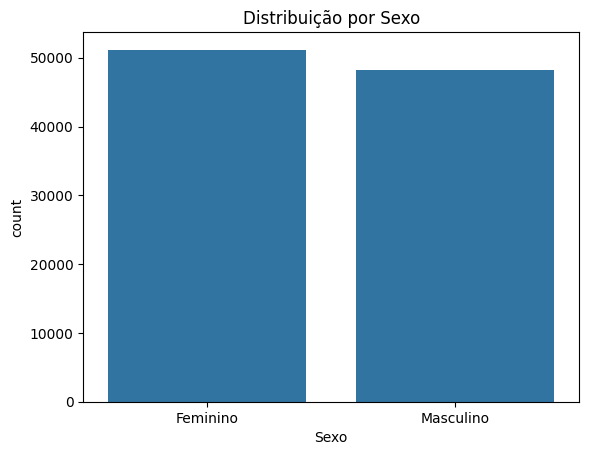

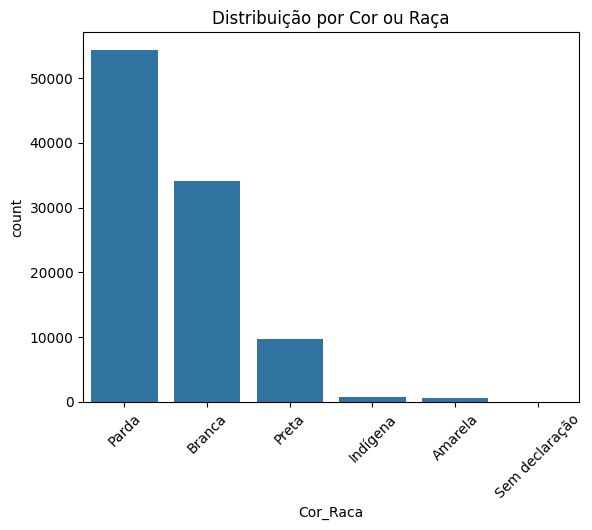

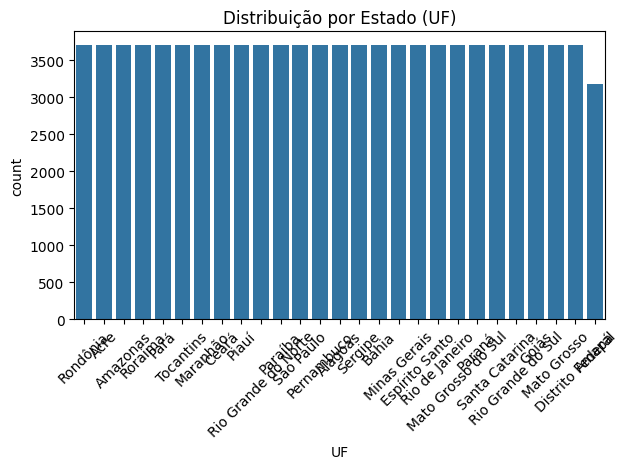

In [4]:
# Sexo
sns.countplot(x='Sexo', data=df)
plt.title('Distribuição por Sexo')
plt.show()

# Cor ou Raça
sns.countplot(x='Cor_Raca', data=df, order=df['Cor_Raca'].value_counts().index)
plt.title('Distribuição por Cor ou Raça')
plt.xticks(rotation=45)
plt.show()

# Estado (UF)
sns.countplot(x='UF', data=df, order=df['UF'].value_counts().index)
plt.title('Distribuição por Estado (UF)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Sexo
Feminino      59295.219410
Masculino    173469.166394
Name: Renda_Total, dtype: float64
Cor_Raca
Amarela            59899.021978
Branca            134347.775090
Indígena           88287.938802
Parda             102607.149810
Preta             119099.265970
Sem declaração       151.304348
Name: Renda_Total, dtype: float64


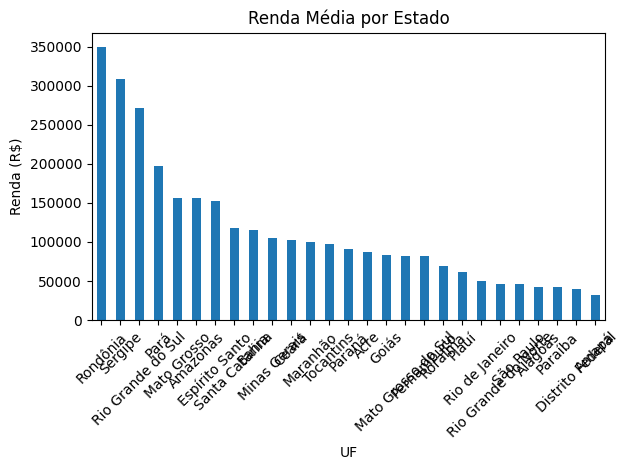

In [5]:
# Renda média por sexo
print(df.groupby('Sexo')['Renda_Total'].mean())

# Renda média por cor/raça
print(df.groupby('Cor_Raca')['Renda_Total'].mean())

# Renda por estado
df.groupby('UF')['Renda_Total'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Renda Média por Estado')
plt.ylabel('Renda (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
print(df.columns.tolist())

['Ano', 'Trimestre', 'UF', 'Capital', 'RM_RIDE', 'UPA', 'Estrato', 'Selecao_Domicilio', 'Painel', 'Situacao_Domicilio', 'Tipo de área (1 - Urbana, 2 - Rural)', 'Projeção da população por níveis geográficos', 'Peso do domicílio e das pessoas', 'Peso do domicílio e das pessoas (com correção)', 'Projeção da população por sexo e idade', 'Domínios de projeção geográficos', 'Domínios de projeção por sexo e idade', 'Número de pessoas no domicílio', 'Número de ordem dos moradores', 'Condição no domicílio', 'Sexo', 'Dia de nascimento (01 a 31)', 'Mês de nascimento (01 a 12)', 'Ano de nascimento', 'Idade do morador na data de referência', 'Cor_Raca', 'Sabe ler e escrever? (1 - Sim, 2 - Não)', 'Frequenta escola? (1 - Sim, 2 - Não)', 'Tipo de escola frequentada (1 - Pública, 2 - Privada)', 'Curso frequentado (01 - Pré-escola, 02 - Ensino Fundamental, etc.)', 'Tipo de organização do curso (1 - Anos, 2 - Períodos semestrais)', 'Ano/Série que frequenta', 'Ensino fundamental regular ou EJA? (1 - Sim, 

In [7]:
df.columns 

Index(['Ano', 'Trimestre', 'UF', 'Capital', 'RM_RIDE', 'UPA', 'Estrato',
       'Selecao_Domicilio', 'Painel', 'Situacao_Domicilio',
       ...
       'Valor recebido de outros rendimentos (em reais)', 'Tipo_Domicilio',
       'Material_Paredes', 'Material_Telhado', 'Material_Piso', 'Comodos',
       'Dormitorios', 'Abastecimento_Agua', 'Acesso_Rede_Agua', 'Renda_Total'],
      dtype='object', length=158)

In [8]:
# Mapeamento
map_escolaridade = {
    2: "Sem instrução",
    3: "Fund. 1ª a 4ª série",
    4: "Fund. 5ª a 8ª série",
    5: "Fundamental completo",
    6: "Médio incompleto",
    7: "Médio completo",
    8: "Superior incompleto",
    9: "Superior completo",
    10: "Mestrado incompleto",
    11: "Mestrado completo",
    12: "Doutorado incompleto",
    13: "Doutorado completo",
    14: "Alfabetização adultos",
    15: "Educação infantil"
}

# Aplicando o mapeamento na coluna correta
df['Escolaridade_Label'] = df['Curso mais elevado frequentado anteriormente'].map(map_escolaridade)


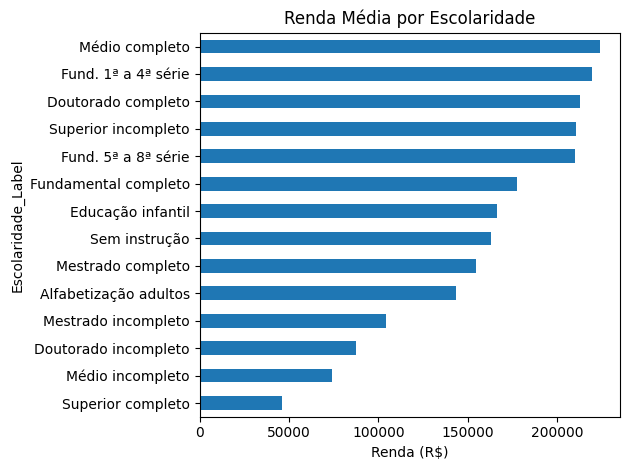

In [9]:
# Escolaridade X Renda
df.groupby('Escolaridade_Label')['Renda_Total'].mean().sort_values().plot(kind='barh')
plt.title('Renda Média por Escolaridade')
plt.xlabel('Renda (R$)')
plt.tight_layout()
plt.show()



In [10]:
df[df['UF'] == 'Rondônia']['Renda_Total'].describe()


count    3.703000e+03
mean     3.500838e+05
std      3.703527e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.422823e+07
Name: Renda_Total, dtype: float64

In [11]:
df[df['UF'] == 'Rondônia'].sort_values(by='Renda_Total', ascending=False).head(10)


,Ano,Trimestre,UF,Capital,RM_RIDE,UPA,Estrato,Selecao_Domicilio,Painel,Situacao_Domicilio,...,Tipo_Domicilio,Material_Paredes,Material_Telhado,Material_Piso,Comodos,Dormitorios,Abastecimento_Agua,Acesso_Rede_Agua,Renda_Total,Escolaridade_Label
3329,2023,2,Rondônia,NaN,NaN,110014563,1152021,10,11,2,...,NaN,NaN,Telha,Cimento,NaN,NaN,NaN,NaN,94228234.0,Médio completo
3011,2023,4,Rondônia,NaN,NaN,110008390,1152021,11,11,2,...,NaN,NaN,Laje,Cimento,NaN,NaN,NaN,NaN,92337102.0,Fundamental completo
2244,2023,1,Rondônia,NaN,NaN,110020753,1152022,12,10,2,...,NaN,NaN,Laje,Cimento,NaN,NaN,NaN,NaN,92127102.0,Mestrado incompleto
959,2023,2,Rondônia,NaN,NaN,110006057,1152021,4,11,2,...,NaN,NaN,Laje,Cimento,NaN,NaN,NaN,NaN,92117204.0,Médio completo
3475,2023,3,Rondônia,NaN,NaN,110012030,1152021,8,11,2,...,NaN,NaN,Laje,Cimento,NaN,NaN,NaN,NaN,61217122.0,Mestrado incompleto
371,2023,4,Rondônia,NaN,NaN,110008390,1152021,4,11,2,...,NaN,NaN,Telha,Cerâmica,0.0,0.0,Rede Geral,NaN,61217102.0,Médio completo
30,2023,4,Rondônia,NaN,NaN,110008390,1152021,1,11,2,...,NaN,NaN,Telha,Cimento,NaN,NaN,NaN,NaN,61217102.0,Doutorado completo
2138,2023,1,Rondônia,NaN,NaN,110013267,1152021,3,10,2,...,NaN,NaN,Laje,Cimento,NaN,NaN,NaN,NaN,61217102.0,Mestrado incompleto
304,2023,4,Rondônia,NaN,NaN,110018817,1152011,12,11,1,...,NaN,NaN,Laje,Cimento,NaN,NaN,NaN,NaN,16001260.0,Doutorado completo
2118,2023,2,Rondônia,NaN,NaN,110004490,1151012,3,11,1,...,NaN,NaN,Laje,Cimento,NaN,NaN,NaN,NaN,12001137.0,Mestrado incompleto


In [12]:
df_renda_valida = df[(df['Renda_Total'] > 0) & (df['Renda_Total'] < 1_000_000)]


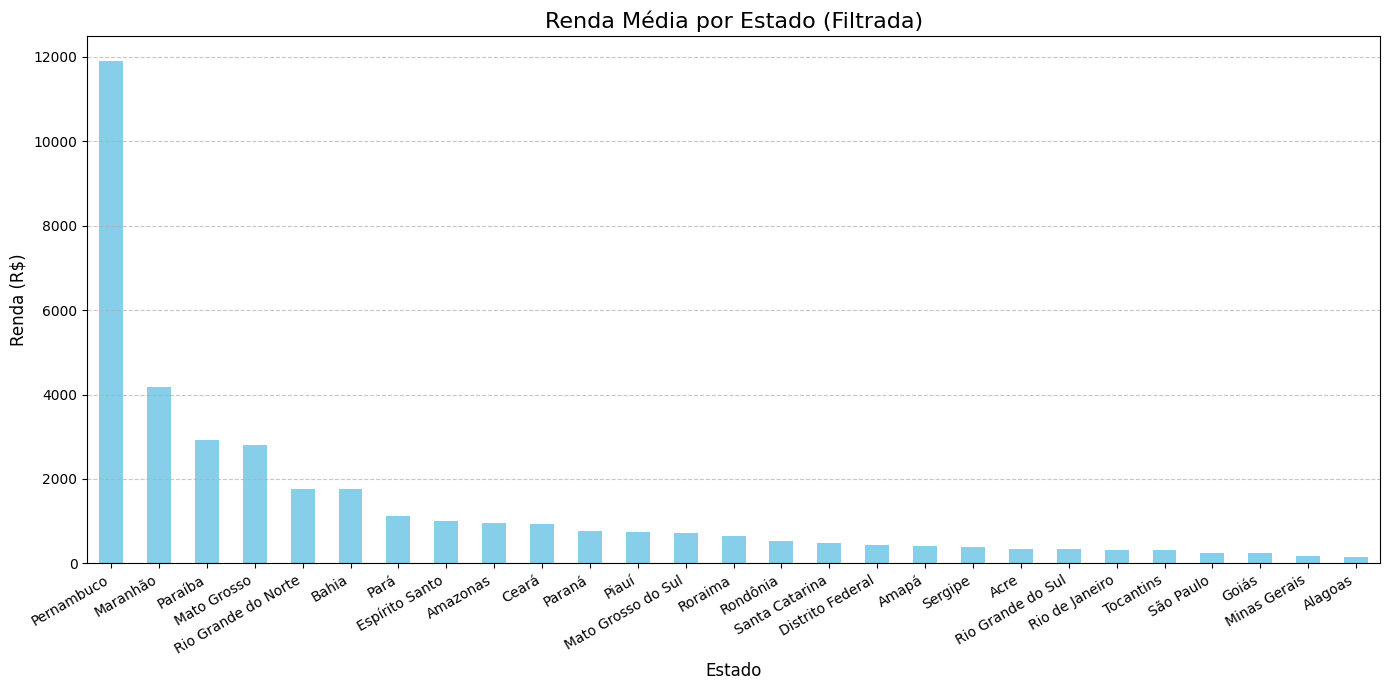

In [13]:
# Agrupamento e ordenação
media_por_estado = df_renda_valida.groupby('UF')['Renda_Total'].mean().sort_values(ascending=False)

# Plot com melhorias visuais
plt.figure(figsize=(14, 7))  # Aumenta o tamanho da figura
media_por_estado.plot(kind='bar', color='skyblue')

plt.title('Renda Média por Estado (Filtrada)', fontsize=16)
plt.ylabel('Renda (R$)', fontsize=12)
plt.xlabel('Estado', fontsize=12)
plt.xticks(rotation=30, ha='right', fontsize=10)  # Inclinação e alinhamento dos rótulos
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grade horizontal suave
plt.tight_layout()
plt.show()


In [14]:
df_renda_valida['UF'].value_counts()


UF
Piauí                  1047
Sergipe                 935
Alagoas                 916
Bahia                   910
Ceará                   826
Rio Grande do Norte     818
Paraíba                 808
Maranhão                800
Pernambuco              779
Tocantins               760
Minas Gerais            734
Goiás                   719
Roraima                 718
Amapá                   713
Pará                    706
Distrito Federal        700
Espírito Santo          624
Acre                    624
Amazonas                604
Mato Grosso do Sul      590
Mato Grosso             563
Rio de Janeiro          542
São Paulo               472
Rio Grande do Sul       469
Paraná                  456
Rondônia                452
Santa Catarina          310
Name: count, dtype: int64

In [15]:
df_renda_valida.groupby('UF')['Renda_Total'].median().sort_values(ascending=False)


UF
Santa Catarina         50.0
Rondônia               50.0
Acre                   20.0
Mato Grosso            20.0
Ceará                  20.0
Distrito Federal       20.0
Espírito Santo         20.0
Goiás                  20.0
Mato Grosso do Sul     20.0
Amapá                  20.0
Amazonas               20.0
Roraima                20.0
Rio Grande do Norte    20.0
Rio de Janeiro         20.0
Minas Gerais           20.0
Pará                   20.0
Pernambuco             20.0
Paraná                 20.0
Paraíba                20.0
Tocantins              20.0
São Paulo              20.0
Rio Grande do Sul      20.0
Sergipe                10.0
Maranhão                2.0
Bahia                   2.0
Alagoas                 2.0
Piauí                   2.0
Name: Renda_Total, dtype: float64

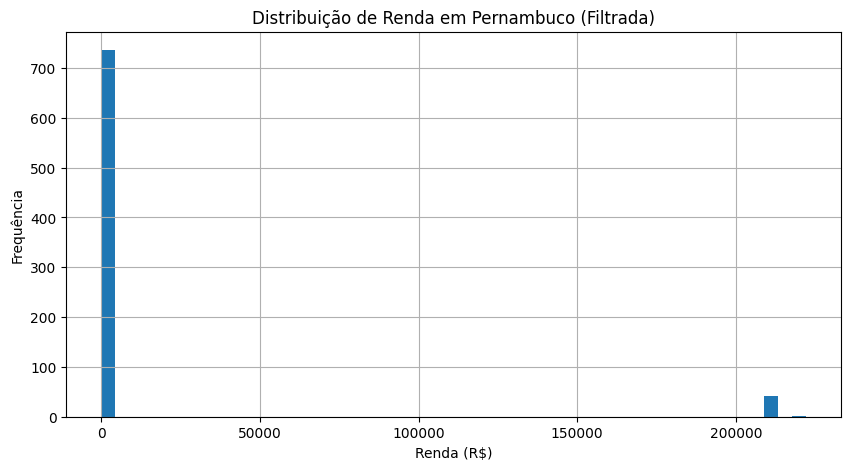

In [16]:
df_pe = df_renda_valida[df_renda_valida['UF'] == 'Pernambuco']
df_pe['Renda_Total'].hist(bins=50, figsize=(10, 5))
plt.title('Distribuição de Renda em Pernambuco (Filtrada)')
plt.xlabel('Renda (R$)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


In [17]:
df['Renda_Total'].describe()


count    9.945200e+04
mean     1.147256e+05
std      1.768177e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.443822e+07
Name: Renda_Total, dtype: float64

In [18]:
# Renda zero
renda_zero = df[df['Renda_Total'] == 0].shape[0]

# Renda nula (NaN)
renda_nan = df['Renda_Total'].isna().sum()

# Total de registros
total_registros = df.shape[0]

print(f"Total de registros: {total_registros}")
print(f"Renda = 0: {renda_zero} registros ({renda_zero / total_registros:.2%})")
print(f"Renda ausente (NaN): {renda_nan} registros ({renda_nan / total_registros:.2%})")


Total de registros: 99452
Renda = 0: 77567 registros (77.99%)
Renda ausente (NaN): 0 registros (0.00%)


In [19]:
renda_positiva = df[df['Renda_Total'] > 0].shape[0]
print(f"Renda > 0: {renda_positiva} registros ({renda_positiva / total_registros:.2%})")


Renda > 0: 21885 registros (22.01%)


In [20]:
df['Renda_Total'] = pd.to_numeric(df['Renda_Total'], errors='coerce')  # garantir tipo numérico
df['Renda_Zero'] = df['Renda_Total'] == 0


In [21]:
sexo_renda = df.groupby(['Sexo', 'Renda_Zero']).size().unstack().fillna(0)
sexo_renda_percent = sexo_renda.div(sexo_renda.sum(axis=1), axis=0) * 100

# Visualizar como tabela
print(sexo_renda_percent.round(2))


Renda_Zero  False  True 
Sexo                    
Feminino    20.98  79.02
Masculino   23.09  76.91


In [22]:
estado_renda = df.groupby(['UF', 'Renda_Zero']).size().unstack().fillna(0)
estado_renda_percent = estado_renda.div(estado_renda.sum(axis=1), axis=0) * 100

# Visualizar como tabela
print(estado_renda_percent.round(2))


Renda_Zero           False  True 
UF                               
Acre                 19.79  80.21
Alagoas              26.65  73.35
Amapá                23.98  76.02
Amazonas             22.25  77.75
Bahia                28.73  71.27
Ceará                24.98  75.02
Distrito Federal     19.34  80.66
Espírito Santo       21.71  78.29
Goiás                21.82  78.18
Maranhão             26.03  73.97
Mato Grosso          18.90  81.10
Mato Grosso do Sul   18.28  81.72
Minas Gerais         23.79  76.21
Paraná               16.58  83.42
Paraíba              23.60  76.40
Pará                 23.06  76.94
Pernambuco           23.39  76.61
Piauí                30.89  69.11
Rio Grande do Norte  23.82  76.18
Rio Grande do Sul    18.23  81.77
Rio de Janeiro       15.26  84.74
Rondônia             21.04  78.96
Roraima              22.55  77.45
Santa Catarina       12.23  87.77
Sergipe              28.63  71.37
São Paulo            14.31  85.69
Tocantins            24.57  75.43


In [23]:
escolaridade_sexo = df.groupby(['Escolaridade_Label', 'Sexo', 'Renda_Zero']).size().unstack().fillna(0)
escolaridade_sexo_percent = escolaridade_sexo.div(escolaridade_sexo.sum(axis=1), axis=0) * 100

# Visualizar como tabela
print(escolaridade_sexo_percent.round(2))


Renda_Zero                       False  True 
Escolaridade_Label    Sexo                   
Alfabetização adultos Feminino   43.28  56.72
                      Masculino  37.06  62.94
Doutorado completo    Feminino   38.22  61.78
                      Masculino  36.61  63.39
Doutorado incompleto  Feminino   30.34  69.66
                      Masculino  28.09  71.91
Educação infantil     Feminino   55.42  44.58
                      Masculino  52.53  47.47
Fund. 1ª a 4ª série   Feminino   10.00  90.00
                      Masculino  29.04  70.96
Fund. 5ª a 8ª série   Feminino   19.41  80.59
                      Masculino  34.59  65.41
Fundamental completo  Feminino   10.29  89.71
                      Masculino  22.19  77.81
Mestrado completo     Feminino   36.75  63.25
                      Masculino  33.66  66.34
Mestrado incompleto   Feminino   30.48  69.52
                      Masculino  30.54  69.46
Médio completo        Feminino   26.38  73.62
                      Masculino  3

In [24]:
# Conversão de tipos
df['Renda_Total'] = pd.to_numeric(df['Renda_Total'], errors='coerce')
df['Idade do morador na data de referência'] = pd.to_numeric(df['Idade do morador na data de referência'], errors='coerce')
df['Curso mais elevado frequentado anteriormente'] = pd.to_numeric(df['Curso mais elevado frequentado anteriormente'], errors='coerce')

# Criar coluna auxiliar
df['Renda_Zero'] = df['Renda_Total'] == 0

In [25]:
bins_idade = [0, 17, 25, 35, 45, 60, 80, 120]
labels_idade = ['0-17', '18-25', '26-35', '36-45', '46-60', '61-80', '81+']
df['Faixa_Etaria'] = pd.cut(df['Idade do morador na data de referência'], bins=bins_idade, labels=labels_idade)


In [26]:
# Subconjunto com renda zero
df_renda_zero = df[df['Renda_Total'] == 0]

# Distribuição por sexo
sexo_dist = df_renda_zero['Sexo'].value_counts(normalize=True) * 100
print("Distribuição por Sexo (Renda Zero):\n", sexo_dist.round(2))

# Distribuição por faixa etária
faixa_etaria_dist = df_renda_zero['Faixa_Etaria'].value_counts(normalize=True) * 100
print("\nDistribuição por Faixa Etária (Renda Zero):\n", faixa_etaria_dist.round(2))

# Distribuição por escolaridade
escolaridade_dist = df_renda_zero['Escolaridade_Label'].value_counts(normalize=True) * 100
print("\nDistribuição por Escolaridade (Renda Zero):\n", escolaridade_dist.round(2))


Distribuição por Sexo (Renda Zero):
 Sexo
Feminino     52.13
Masculino    47.87
Name: proportion, dtype: float64

Distribuição por Faixa Etária (Renda Zero):
 Faixa_Etaria
0-17     30.19
46-60    16.26
61-80    15.12
26-35    12.79
36-45    12.58
18-25    10.51
81+       2.55
Name: proportion, dtype: float64

Distribuição por Escolaridade (Renda Zero):
 Escolaridade_Label
Mestrado incompleto      36.67
Médio completo           26.86
Doutorado incompleto     13.85
Fundamental completo     10.74
Doutorado completo        3.13
Fund. 1ª a 4ª série       2.03
Médio incompleto          1.75
Mestrado completo         1.34
Superior completo         1.13
Superior incompleto       1.00
Fund. 5ª a 8ª série       0.52
Alfabetização adultos     0.48
Sem instrução             0.33
Educação infantil         0.18
Name: proportion, dtype: float64


In [27]:
colunas_trabalho = ['Trabalhou na semana de referência? (1 - Sim, 2 - Não)', 'Trabalhou na semana de referência?']
col_trabalho = next((col for col in colunas_trabalho if col in df.columns), None)

if col_trabalho:
    trabalho_dist = df_renda_zero[col_trabalho].value_counts(normalize=True) * 100
    print("\nDistribuição por Situação de Trabalho (Renda Zero):\n", trabalho_dist.round(2))



Distribuição por Situação de Trabalho (Renda Zero):
 Trabalhou na semana de referência? (1 - Sim, 2 - Não)
1.0    86.94
2.0    13.06
Name: proportion, dtype: float64


In [28]:
total_registros_amostra = df.shape[0]
print(f"Quantidade total de registros na amostra: {total_registros_amostra}")

Quantidade total de registros na amostra: 99452


In [29]:
registros_por_estado = df['UF'].value_counts()
print(registros_por_estado)

UF
Rondônia               3703
Acre                   3703
Amazonas               3703
Roraima                3703
Pará                   3703
Tocantins              3703
Maranhão               3703
Ceará                  3703
Piauí                  3703
Rio Grande do Norte    3703
Paraíba                3703
São Paulo              3703
Pernambuco             3703
Alagoas                3703
Sergipe                3703
Bahia                  3703
Minas Gerais           3703
Espírito Santo         3703
Rio de Janeiro         3703
Mato Grosso do Sul     3703
Paraná                 3703
Santa Catarina         3703
Rio Grande do Sul      3703
Goiás                  3703
Mato Grosso            3703
Distrito Federal       3703
Amapá                  3174
Name: count, dtype: int64


In [30]:
# Informações gerais sobre o DataFrame
print("Informações gerais do DataFrame:")
print(df.info())

# Exemplo de valores únicos por coluna
print("\nValores únicos por coluna:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")

# Exemplo de valores únicos e tipos de dados
print("\nExemplo de valores únicos e tipos de dados:")
for col in df.columns:
    print(f"Coluna: {col}")
    print(f"Tipo de dado: {df[col].dtype}")
    print(f"Valores únicos: {df[col].unique()[:5]}{'...' if len(df[col].unique()) > 5 else ''}")
    print("-" * 50)

Informações gerais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99452 entries, 0 to 99451
Columns: 161 entries, Ano to Faixa_Etaria
dtypes: bool(1), category(1), float64(125), int64(21), object(13)
memory usage: 120.8+ MB
None

Valores únicos por coluna:
Ano: 1 valores únicos
Trimestre: 4 valores únicos
UF: 27 valores únicos
Capital: 27 valores únicos
RM_RIDE: 21 valores únicos
UPA: 11924 valores únicos
Estrato: 572 valores únicos
Selecao_Domicilio: 14 valores únicos
Painel: 2 valores únicos
Situacao_Domicilio: 2 valores únicos
Tipo de área (1 - Urbana, 2 - Rural): 4 valores únicos
Projeção da população por níveis geográficos: 77 valores únicos
Peso do domicílio e das pessoas: 1736 valores únicos
Peso do domicílio e das pessoas (com correção): 2863 valores únicos
Projeção da população por sexo e idade: 34 valores únicos
Domínios de projeção geográficos: 77 valores únicos
Domínios de projeção por sexo e idade: 34 valores únicos
Número de pessoas no domicílio: 18 valor

In [31]:
# 1. Mapeamento de UF para siglas
uf_map = {
    'Acre': 'AC', 'Alagoas': 'AL', 'Amapá': 'AP', 'Amazonas': 'AM', 'Bahia': 'BA',
    'Ceará': 'CE', 'Distrito Federal': 'DF', 'Espírito Santo': 'ES', 'Goiás': 'GO',
    'Maranhão': 'MA', 'Mato Grosso': 'MT', 'Mato Grosso do Sul': 'MS', 'Minas Gerais': 'MG',
    'Pará': 'PA', 'Paraíba': 'PB', 'Paraná': 'PR', 'Pernambuco': 'PE', 'Piauí': 'PI',
    'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN', 'Rio Grande do Sul': 'RS',
    'Rondônia': 'RO', 'Roraima': 'RR', 'Santa Catarina': 'SC', 'São Paulo': 'SP',
    'Sergipe': 'SE', 'Tocantins': 'TO'
}

# 2. Mapeamento de Sexo para código (RAIS usa 1: masc, 2: fem)
sexo_map = {'Masculino': 1, 'Feminino': 2}

# 3. Mapeamento de escolaridade (baseado na PNAD para RAIS)
escolaridade_map = {
    'Sem instrução': 1,
    'Educação infantil': 2,
    'Fund. 1ª a 4ª série': 3,
    'Fund. 5ª a 8ª série': 4,
    'Fundamental completo': 5,
    'Médio incompleto': 6,
    'Médio completo': 7,
    'Superior incompleto': 8,
    'Superior completo': 9,
    'Mestrado incompleto': 9,
    'Mestrado completo': 9,
    'Doutorado incompleto': 9,
    'Doutorado completo': 9,
    'Alfabetização adultos': 3
}

# 4. Criar as colunas equivalentes da PNAD
pnad_df = df.copy()  # Use o seu DataFrame da PNAD original aqui
pnad_df['sigla_uf'] = pnad_df['UF'].map(uf_map)
pnad_df['sexo'] = pnad_df['Sexo'].map(sexo_map)
pnad_df['grau_instrucao'] = pnad_df['Escolaridade_Label'].map(escolaridade_map)
pnad_df['faixa_etaria'] = pnad_df['Faixa_Etaria']

# Verifica se tudo foi mapeado corretamente
print(pnad_df[['sigla_uf', 'sexo', 'grau_instrucao', 'faixa_etaria']].dropna().head())


   sigla_uf  sexo  grau_instrucao faixa_etaria
4        RO     2             7.0        26-35
6        RO     1             7.0        46-60
7        RO     1             9.0        36-45
8        RO     1             5.0        61-80
11       RO     1             9.0        46-60


In [32]:
# Verifique se as colunas da RAIS estão no tipo correto
rais_df['grau_instrucao'] = pd.to_numeric(rais_df['grau_instrucao'], errors='coerce')
rais_df['sexo'] = pd.to_numeric(rais_df['sexo'], errors='coerce')

# Merge com base nos 4 critérios
pnad_com_renda_estim = pd.merge(
    pnad_df,
    rais_df,
    how='left',
    left_on=['sigla_uf', 'sexo', 'grau_instrucao', 'faixa_etaria'],
    right_on=['sigla_uf', 'sexo', 'grau_instrucao', 'faixa_etaria']
)

# Exibe os primeiros registros com a média salarial estimada
print(pnad_com_renda_estim[['UF', 'Sexo', 'Escolaridade_Label', 'Faixa_Etaria', 'media_salarial']].head())



         UF       Sexo Escolaridade_Label Faixa_Etaria  media_salarial
0  Rondônia   Feminino                NaN        46-60             NaN
1  Rondônia  Masculino                NaN         0-17             NaN
2  Rondônia  Masculino                NaN         0-17             NaN
3  Rondônia   Feminino                NaN        26-35             NaN
4  Rondônia   Feminino     Médio completo        26-35     1878.975487


In [33]:
print(sorted(pnad_df['Escolaridade_Label'].dropna().unique()))


['Alfabetização adultos', 'Doutorado completo', 'Doutorado incompleto', 'Educação infantil', 'Fund. 1ª a 4ª série', 'Fund. 5ª a 8ª série', 'Fundamental completo', 'Mestrado completo', 'Mestrado incompleto', 'Médio completo', 'Médio incompleto', 'Sem instrução', 'Superior completo', 'Superior incompleto']


In [34]:
print(escolaridade_map)


{'Sem instrução': 1, 'Educação infantil': 2, 'Fund. 1ª a 4ª série': 3, 'Fund. 5ª a 8ª série': 4, 'Fundamental completo': 5, 'Médio incompleto': 6, 'Médio completo': 7, 'Superior incompleto': 8, 'Superior completo': 9, 'Mestrado incompleto': 9, 'Mestrado completo': 9, 'Doutorado incompleto': 9, 'Doutorado completo': 9, 'Alfabetização adultos': 3}


In [35]:
escolaridade_map = {
    'Sem instrução': 1,
    'Educação infantil': 2,
    'Fund. 1ª a 4ª série': 3,
    'Alfabetização adultos': 3,
    'Fund. 5ª a 8ª série': 4,
    'Fundamental completo': 5,
    'Médio incompleto': 6,
    'Médio completo': 7,
    'Superior incompleto': 8,
    'Superior completo': 9,
    'Mestrado incompleto': 10,
    'Mestrado completo': 11,
    'Doutorado incompleto': 12,
    'Doutorado completo': 13
}


In [36]:
pnad_df['grau_instrucao'] = pnad_df['Escolaridade_Label'].map(escolaridade_map)


In [37]:
pnad_df = pd.merge(
    pnad_df,
    rais_df,
    how='left',
    on=['sigla_uf', 'sexo', 'grau_instrucao', 'faixa_etaria']
)


In [38]:
print(pnad_df[['UF', 'Sexo', 'Escolaridade_Label', 'Faixa_Etaria', 'media_salarial']].dropna().head(10))


          UF       Sexo    Escolaridade_Label Faixa_Etaria  media_salarial
4   Rondônia   Feminino        Médio completo        26-35     1878.975487
6   Rondônia  Masculino        Médio completo        46-60     2998.783229
7   Rondônia  Masculino   Mestrado incompleto        36-45    12388.455000
8   Rondônia  Masculino  Fundamental completo        61-80     3638.106586
11  Rondônia  Masculino   Mestrado incompleto        46-60    12977.492397
14  Rondônia  Masculino  Fundamental completo        61-80     3638.106586
17  Rondônia   Feminino   Mestrado incompleto        36-45     9891.723935
18  Rondônia  Masculino        Médio completo        36-45     2662.805355
19  Rondônia   Feminino   Mestrado incompleto        36-45     9891.723935
21  Rondônia  Masculino        Médio completo        61-80     4302.391808


In [39]:
# Cria uma nova coluna com a renda imputada
pnad_df['Renda_Total_Imputada'] = pnad_df['Renda_Total']

# Substitui renda zero pela média salarial da RAIS onde disponível
pnad_df.loc[
    (pnad_df['Renda_Total'] == 0) & (pnad_df['media_salarial'].notna()),
    'Renda_Total_Imputada'
] = pnad_df['media_salarial']


In [40]:
imputados = pnad_df[
    (pnad_df['Renda_Total'] == 0) & 
    (pnad_df['media_salarial'].notna())
]

print(f"Total de registros imputados: {len(imputados)}")


Total de registros imputados: 37911


In [41]:
# Filtrar apenas os registros onde houve imputação
check = pnad_df[
    (pnad_df['Renda_Total'] == 0) & 
    (pnad_df['media_salarial'].notna())
]

# Exibir as primeiras linhas
check[['Renda_Total', 'media_salarial', 'Renda_Total_Imputada']].head()


,Renda_Total,media_salarial,Renda_Total_Imputada
4,0.0,1878.975487,1878.975487
7,0.0,12388.455000,12388.455000
8,0.0,3638.106586,3638.106586
11,0.0,12977.492397,12977.492397
14,0.0,3638.106586,3638.106586


In [42]:
print("Média antes da imputação:", pnad_df['Renda_Total'].mean())
print("Média depois da imputação:", pnad_df['Renda_Total_Imputada'].mean())


Média antes da imputação: 114725.58463379319
Média depois da imputação: 116748.6176743994


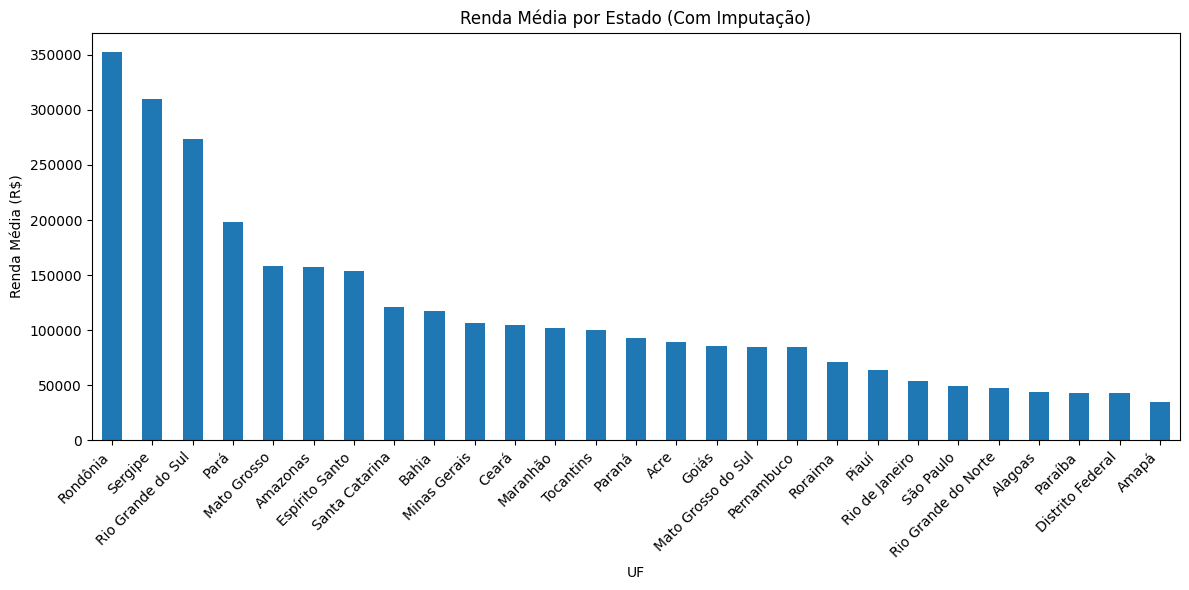

In [43]:
# Renda média por estado usando a coluna imputada
pnad_df.groupby('UF')['Renda_Total_Imputada'].mean().sort_values(ascending=False).plot(
    kind='bar', figsize=(12, 6)
)
plt.title('Renda Média por Estado (Com Imputação)')
plt.ylabel('Renda Média (R$)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

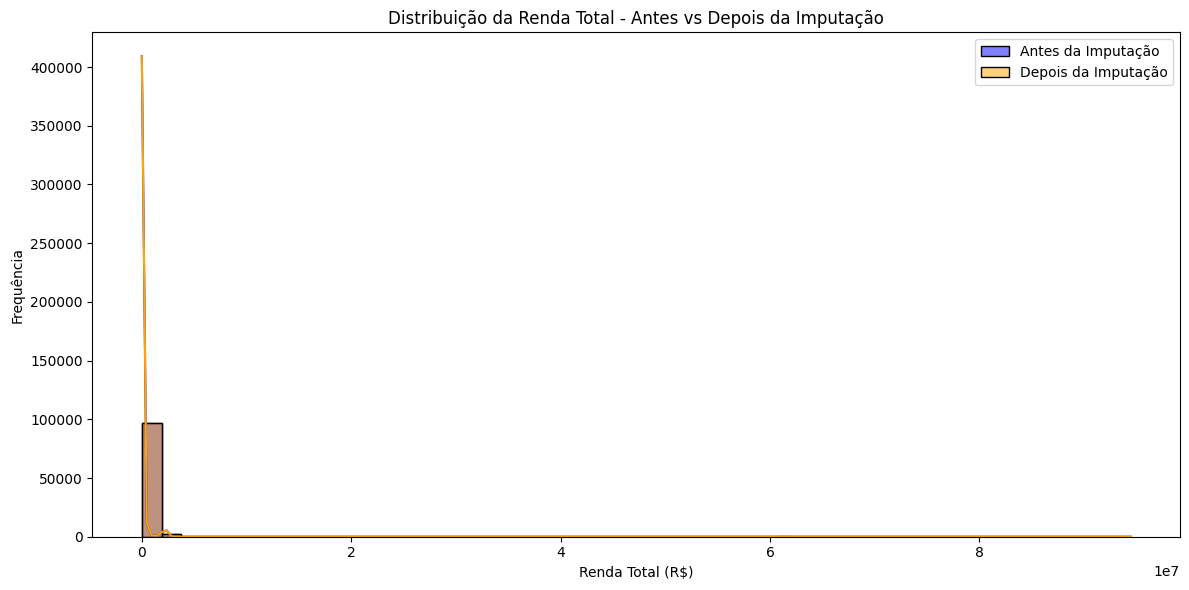

In [44]:
plt.figure(figsize=(12, 6))
sns.histplot(pnad_df['Renda_Total'], label='Antes da Imputação', color='blue', kde=True, bins=50)
sns.histplot(pnad_df['Renda_Total_Imputada'], label='Depois da Imputação', color='orange', kde=True, bins=50)
plt.title('Distribuição da Renda Total - Antes vs Depois da Imputação')
plt.xlabel('Renda Total (R$)')
plt.ylabel('Frequência')
plt.legend()
plt.tight_layout()
plt.show()


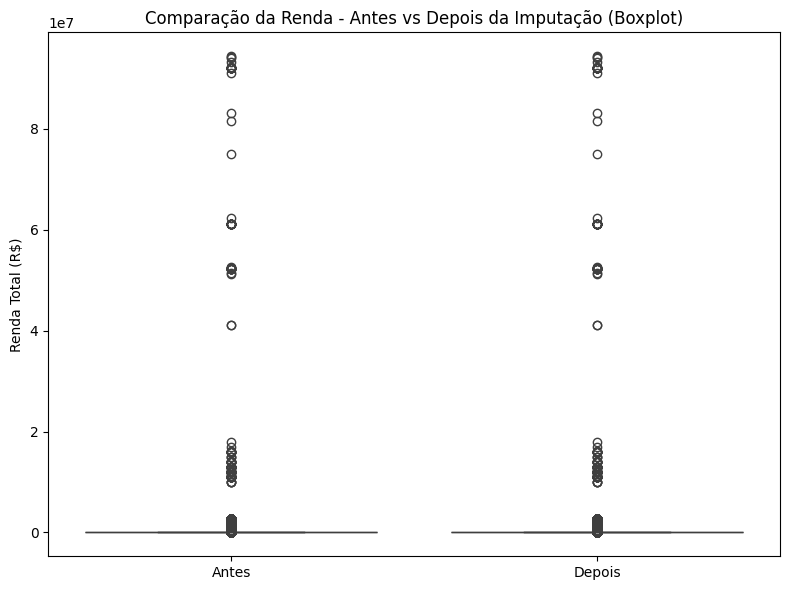

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=pd.DataFrame({
    'Antes': pnad_df['Renda_Total'],
    'Depois': pnad_df['Renda_Total_Imputada']
}))
plt.title('Comparação da Renda - Antes vs Depois da Imputação (Boxplot)')
plt.ylabel('Renda Total (R$)')
plt.tight_layout()
plt.show()



In [46]:
# Cria uma coluna booleana: True se foi imputada, False se não foi
pnad_df['Renda_Imputada'] = (pnad_df['Renda_Total'] == 0) & (pnad_df['media_salarial'].notna())

# Verifica contagem
print(pnad_df['Renda_Imputada'].value_counts())


Renda_Imputada
False    61541
True     37911
Name: count, dtype: int64


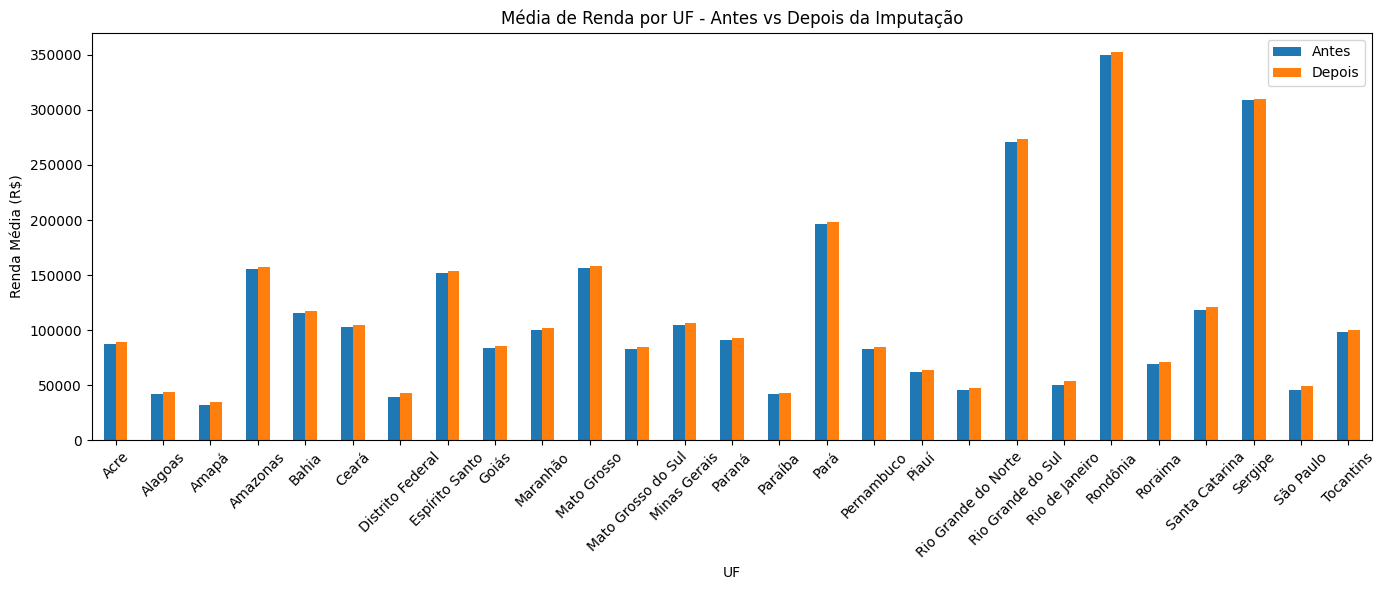

In [47]:
renda_antes = pnad_df.groupby('UF')['Renda_Total'].mean()
renda_depois = pnad_df.groupby('UF')['Renda_Total_Imputada'].mean()

comparacao_uf = pd.DataFrame({'Antes': renda_antes, 'Depois': renda_depois})
comparacao_uf.plot(kind='bar', figsize=(14,6), title='Média de Renda por UF - Antes vs Depois da Imputação')
plt.ylabel("Renda Média (R$)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


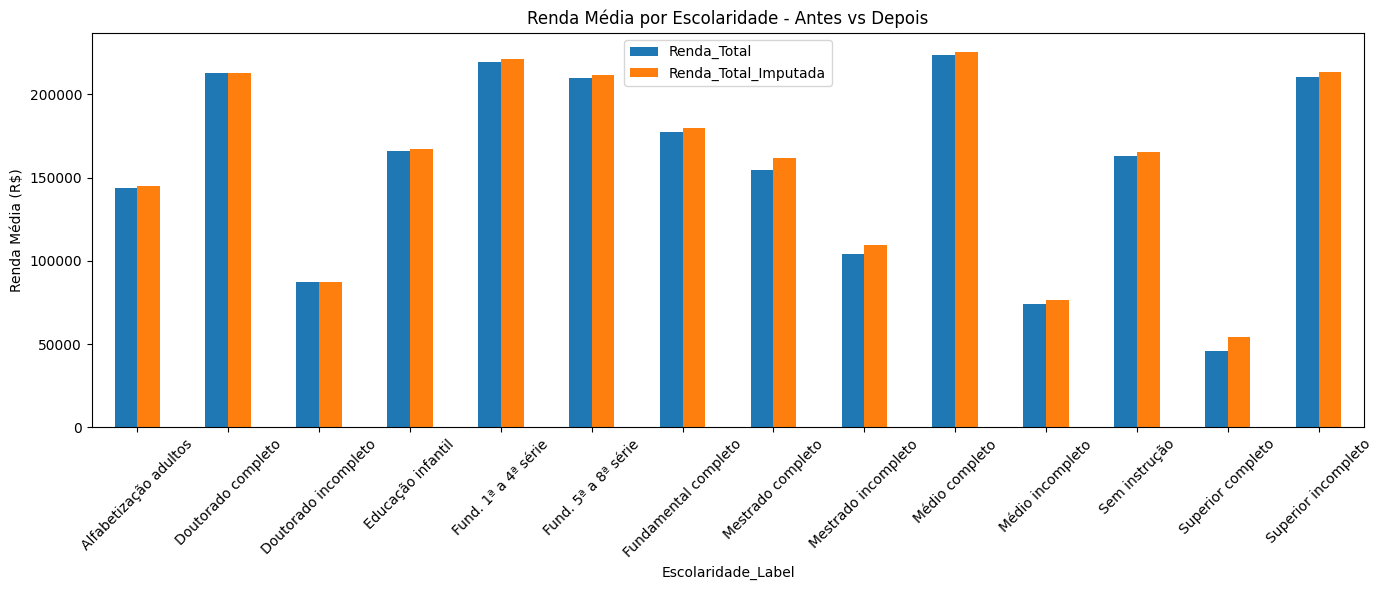

In [48]:
renda_escolaridade = pnad_df.groupby('Escolaridade_Label')[['Renda_Total', 'Renda_Total_Imputada']].mean()
renda_escolaridade.plot(kind='bar', figsize=(14,6), title='Renda Média por Escolaridade - Antes vs Depois')
plt.ylabel("Renda Média (R$)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_36233/2211709246.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  renda_idade = pnad_df.groupby('Faixa_Etaria')[['Renda_Total', 'Renda_Total_Imputada']].mean()


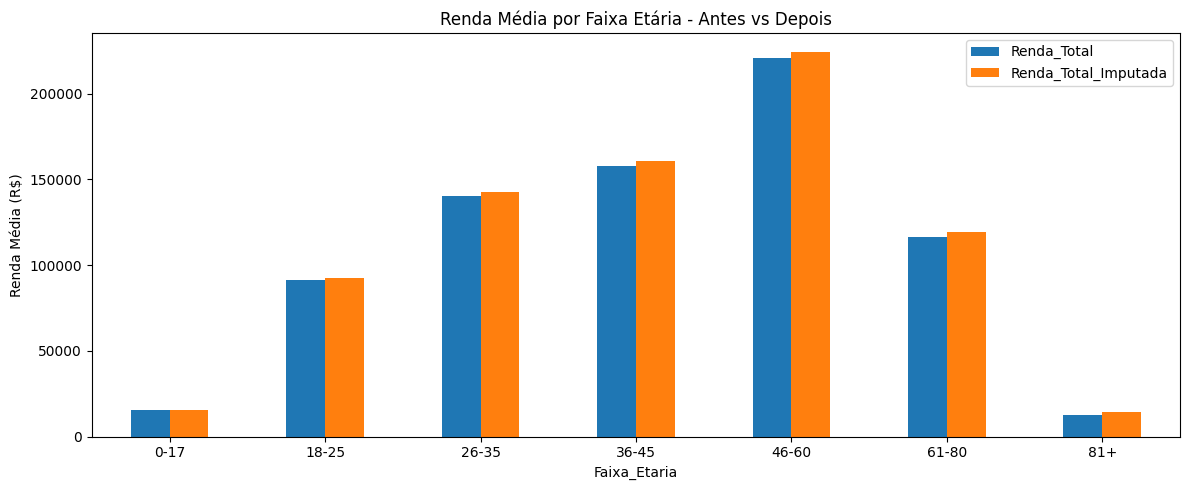

In [49]:
renda_idade = pnad_df.groupby('Faixa_Etaria')[['Renda_Total', 'Renda_Total_Imputada']].mean()
renda_idade.plot(kind='bar', figsize=(12,5), title='Renda Média por Faixa Etária - Antes vs Depois')
plt.ylabel("Renda Média (R$)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


/tmp/ipykernel_36233/3237764775.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pnad_df[pnad_df['Renda_Imputada']]['Renda_Total_Imputada'], label='Imputados', shade=True)
/tmp/ipykernel_36233/3237764775.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pnad_df[~pnad_df['Renda_Imputada']]['Renda_Total'], label='Originais', shade=True)


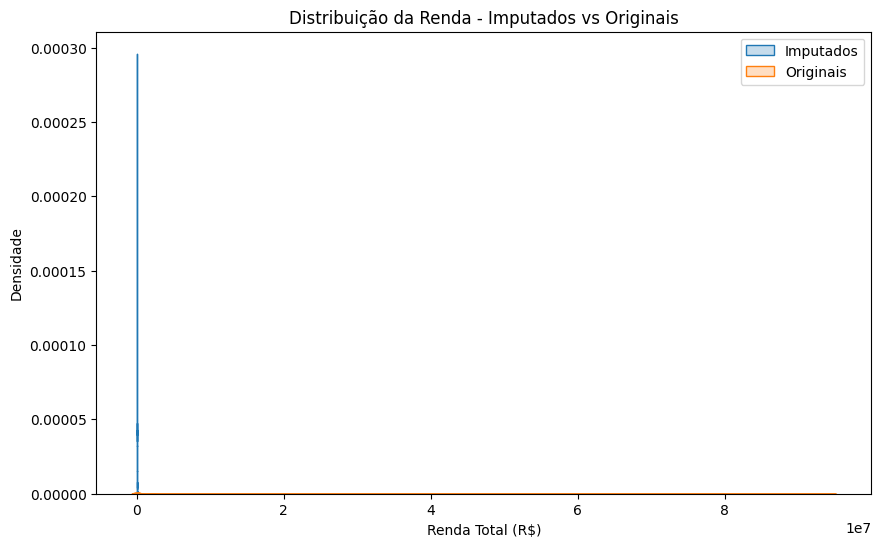

In [50]:
plt.figure(figsize=(10,6))
sns.kdeplot(pnad_df[pnad_df['Renda_Imputada']]['Renda_Total_Imputada'], label='Imputados', shade=True)
sns.kdeplot(pnad_df[~pnad_df['Renda_Imputada']]['Renda_Total'], label='Originais', shade=True)
plt.title('Distribuição da Renda - Imputados vs Originais')
plt.xlabel('Renda Total (R$)')
plt.ylabel('Densidade')
plt.legend()
plt.show()


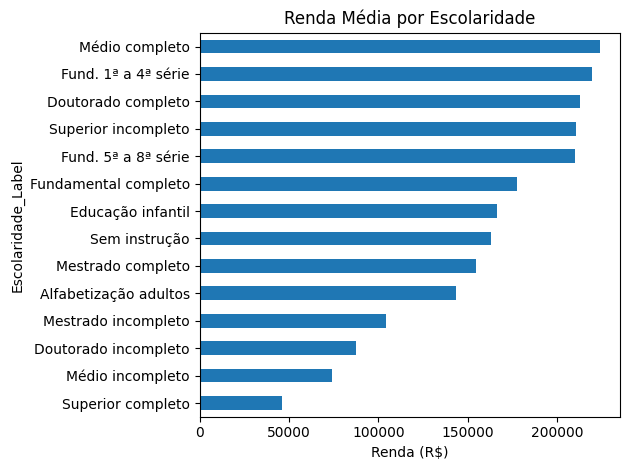

In [51]:
# Escolaridade X Renda
df.groupby('Escolaridade_Label')['Renda_Total'].mean().sort_values().plot(kind='barh')
plt.title('Renda Média por Escolaridade')
plt.xlabel('Renda (R$)')
plt.tight_layout()
plt.show()

In [52]:
pnad_df['UF'].value_counts()


UF
Rondônia               3703
Acre                   3703
Amazonas               3703
Roraima                3703
Pará                   3703
Tocantins              3703
Maranhão               3703
Ceará                  3703
Piauí                  3703
Rio Grande do Norte    3703
Paraíba                3703
São Paulo              3703
Pernambuco             3703
Alagoas                3703
Sergipe                3703
Bahia                  3703
Minas Gerais           3703
Espírito Santo         3703
Rio de Janeiro         3703
Mato Grosso do Sul     3703
Paraná                 3703
Santa Catarina         3703
Rio Grande do Sul      3703
Goiás                  3703
Mato Grosso            3703
Distrito Federal       3703
Amapá                  3174
Name: count, dtype: int64

In [53]:
pnad_df[pnad_df['UF'] == 'Rondônia']['Renda_Imputada'].value_counts()


Renda_Imputada
False    2151
True     1552
Name: count, dtype: int64

In [54]:
pnad_df[pnad_df['UF'] == 'Rondônia']['Escolaridade_Label'].value_counts(normalize=True)


Escolaridade_Label
Mestrado incompleto      0.378543
Médio completo           0.310931
Doutorado incompleto     0.114575
Fundamental completo     0.113765
Doutorado completo       0.029555
Superior incompleto      0.014980
Mestrado completo        0.011741
Médio incompleto         0.009717
Fund. 5ª a 8ª série      0.005668
Fund. 1ª a 4ª série      0.005263
Superior completo        0.002429
Alfabetização adultos    0.001215
Sem instrução            0.000810
Educação infantil        0.000810
Name: proportion, dtype: float64

In [55]:
rais_df[rais_df['sigla_uf'] == 'RO'].groupby(['grau_instrucao', 'sexo', 'faixa_etaria'])['media_salarial'].mean().sort_values(ascending=False)


grau_instrucao  sexo  faixa_etaria
11              1     61-80           23046.185862
10              1     61-80           16845.242400
11              1     46-60           16750.023521
                      36-45           13805.376722
10              2     61-80           13629.056842
                                          ...     
4               1     0-17             1110.237348
6               1     0-17              982.233164
3               2     0-17              891.599000
6               2     0-17              882.015412
4               2     0-17              836.340463
Name: media_salarial, Length: 144, dtype: float64

In [56]:
pnad_df.groupby('UF')['Renda_Total_Imputada'].mean().sort_values(ascending=False)


UF
Rondônia               352421.132334
Sergipe                310154.423199
Rio Grande do Sul      273160.700851
Pará                   198461.654220
Mato Grosso            158550.988220
Amazonas               157612.242197
Espírito Santo         153985.854276
Santa Catarina         120556.969740
Bahia                  117387.275641
Minas Gerais           106512.141421
Ceará                  104822.267628
Maranhão               101582.999477
Tocantins               99798.708450
Paraná                  92914.548592
Acre                    89130.113108
Goiás                   85784.425299
Mato Grosso do Sul      84658.066550
Pernambuco              84255.400596
Roraima                 71004.775167
Piauí                   63555.885623
Rio de Janeiro          53423.563033
São Paulo               49326.866446
Rio Grande do Norte     47647.541431
Alagoas                 43636.084230
Paraíba                 43135.378765
Distrito Federal        42609.129425
Amapá                   34352.69522

In [57]:
pnad_df[pnad_df['UF'] == 'Rondônia'][['Renda_Total_Imputada', 'Escolaridade_Label', 'Faixa_Etaria', 'sexo']].sort_values(by='Renda_Total_Imputada', ascending=False).head(10)


,Renda_Total_Imputada,Escolaridade_Label,Faixa_Etaria,sexo
3329,94228234.0,Médio completo,46-60,1
3011,92337102.0,Fundamental completo,61-80,1
2244,92127102.0,Mestrado incompleto,0-17,1
959,92117204.0,Médio completo,18-25,1
3475,61217122.0,Mestrado incompleto,18-25,1
30,61217102.0,Doutorado completo,36-45,2
371,61217102.0,Médio completo,46-60,2
2138,61217102.0,Mestrado incompleto,61-80,2
304,16001260.0,Doutorado completo,36-45,1
2118,12001137.0,Mestrado incompleto,61-80,2


In [58]:
# Exemplo: Limitar pelos percentis
p95 = rais_df['media_salarial'].quantile(0.95)
rais_df = rais_df[rais_df['media_salarial'] <= p95]


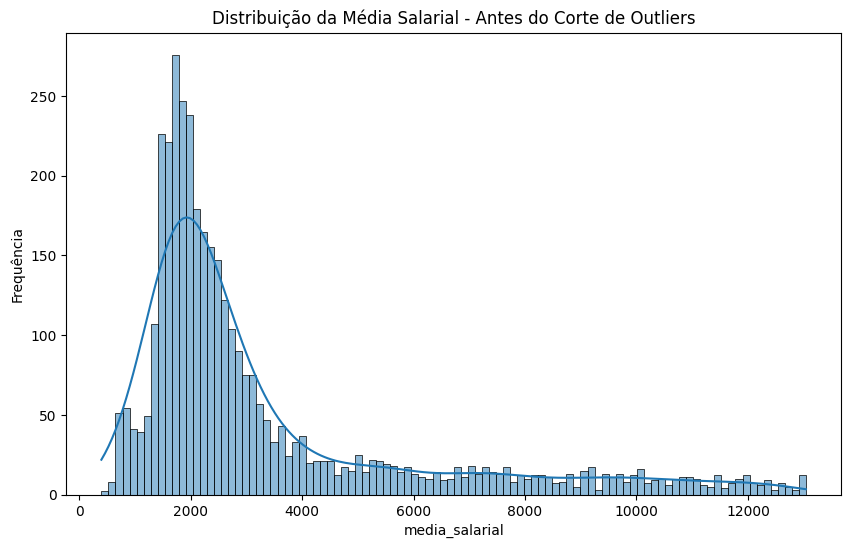

In [59]:
plt.figure(figsize=(10,6))
sns.histplot(rais_df['media_salarial'], bins=100, kde=True)
plt.title('Distribuição da Média Salarial - Antes do Corte de Outliers')
plt.xlabel('media_salarial')
plt.ylabel('Frequência')
plt.show()

In [60]:
# Calcula o valor do percentil 95
limite_superior = rais_df['media_salarial'].quantile(0.95)

# Filtra os dados abaixo ou iguais ao limite
rais_df_filtrado = rais_df[rais_df['media_salarial'] <= limite_superior]

print(f"Total de registros antes: {len(rais_df)}")
print(f"Total de registros após corte de outliers: {len(rais_df_filtrado)}")


Total de registros antes: 3797
Total de registros após corte de outliers: 3607


In [61]:
media_salarial_filtrada = (
    rais_df_filtrado
    .groupby(['grau_instrucao', 'sexo', 'faixa_etaria'])['media_salarial']
    .mean()
    .reset_index()
)


In [62]:
# Cria um dicionário para imputação
map_salario = {
    (row['grau_instrucao'], row['sexo'], row['faixa_etaria']): row['media_salarial']
    for _, row in media_salarial_filtrada.iterrows()
}


In [63]:
def imputar_renda(row):
    chave = (row['grau_instrucao'], row['sexo'], row['faixa_etaria'])
    if row['Renda_Total'] == 0 and chave in map_salario:
        return map_salario[chave]
    else:
        return row['Renda_Total']

pnad_df['Renda_Total_Imputada'] = pnad_df.apply(imputar_renda, axis=1)


In [64]:
# Exemplo com limite superior (ajuste se você tiver um valor diferente)
limite_superior = 20000  # Substitua pelo valor real que você calculou

# Cria a nova coluna SEM os outliers
pnad_df['Renda_Total_Imputada_Outliers'] = pnad_df['Renda_Total_Imputada'].where(
    pnad_df['Renda_Total_Imputada'] <= limite_superior
)


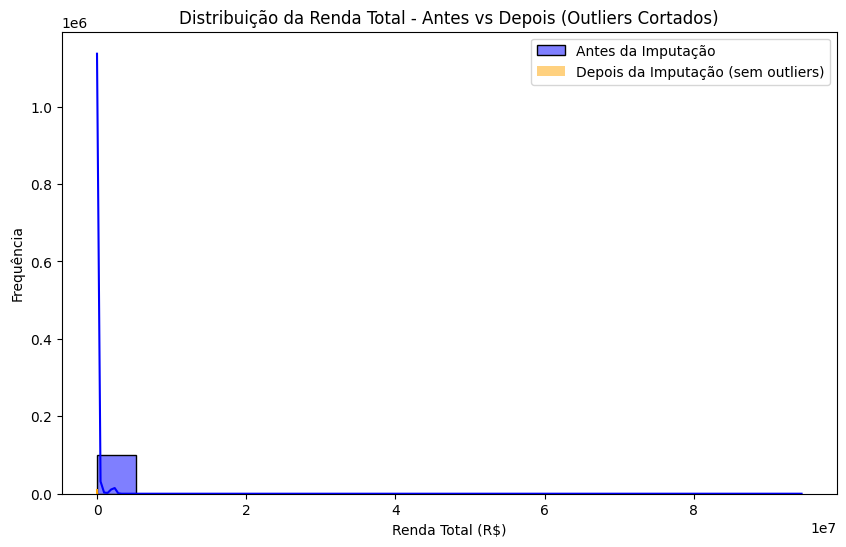

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(pnad_df['Renda_Total'], color='blue', kde=True, label='Antes da Imputação')
sns.histplot(pnad_df['Renda_Total_Imputada_Outliers'], color='orange', kde=True, label='Depois da Imputação (sem outliers)')
plt.legend()
plt.title("Distribuição da Renda Total - Antes vs Depois (Outliers Cortados)")
plt.xlabel("Renda Total (R$)")
plt.ylabel("Frequência")
plt.show()


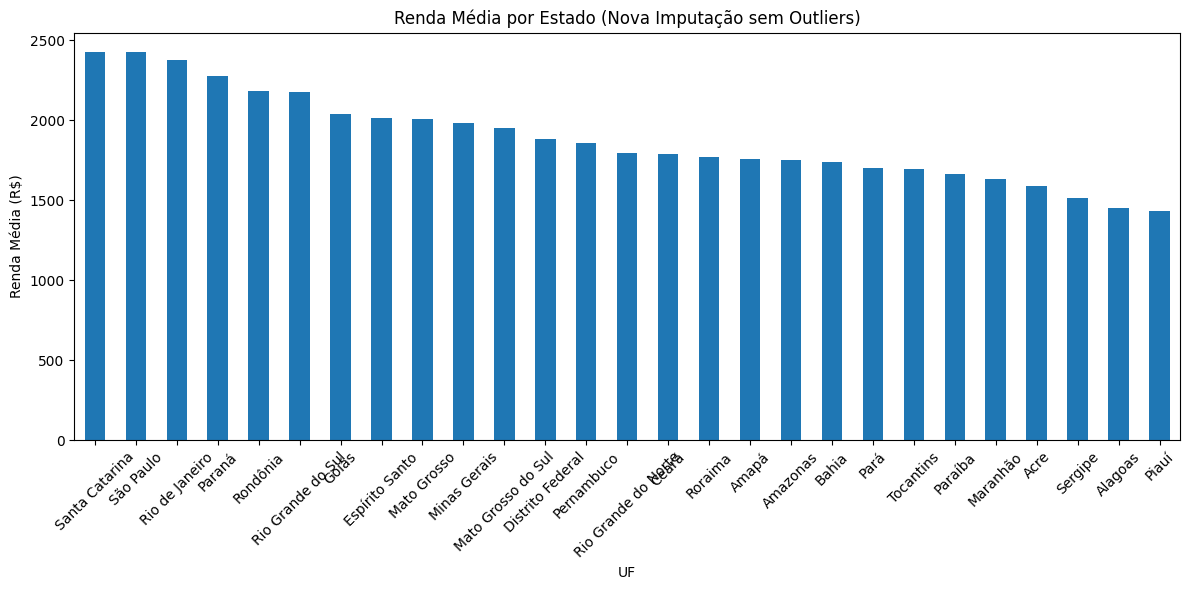

In [66]:
renda_uf_nova = pnad_df.groupby('UF')['Renda_Total_Imputada_Outliers'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
renda_uf_nova.plot(kind='bar')
plt.ylabel("Renda Média (R$)")
plt.title("Renda Média por Estado (Nova Imputação sem Outliers)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


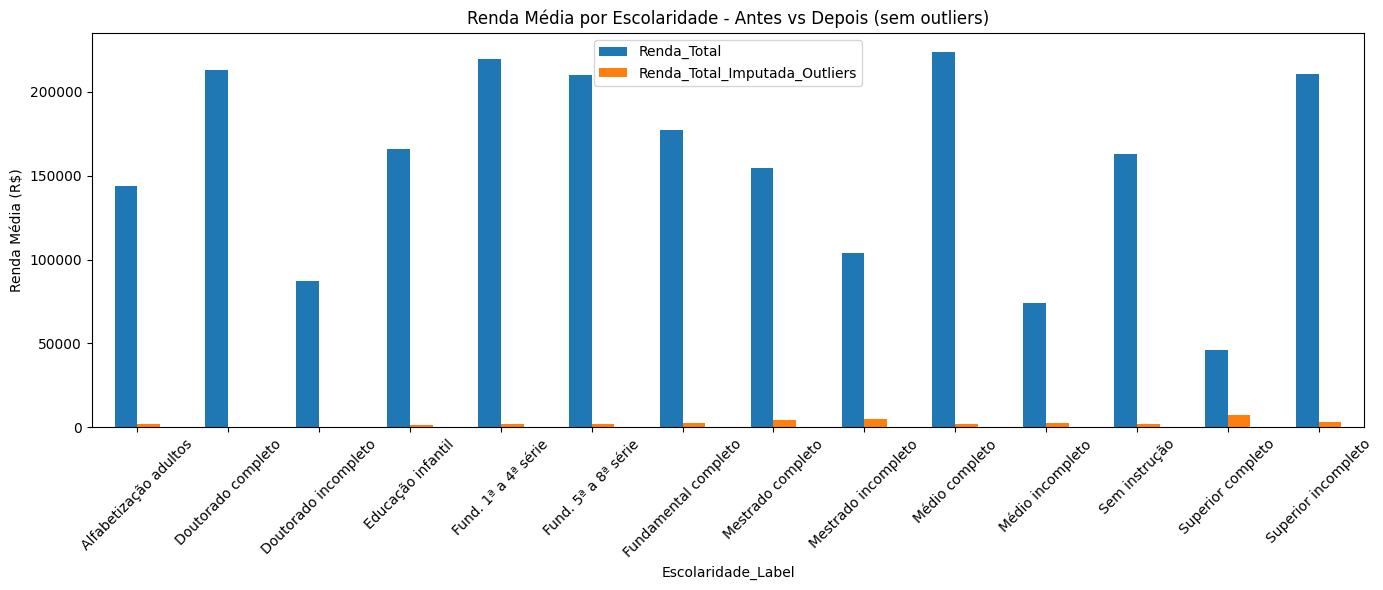

In [67]:
renda_escolaridade = pnad_df.groupby('Escolaridade_Label')[['Renda_Total', 'Renda_Total_Imputada_Outliers']].mean()

renda_escolaridade.plot(kind='bar', figsize=(14, 6), title='Renda Média por Escolaridade - Antes vs Depois (sem outliers)')
plt.ylabel("Renda Média (R$)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


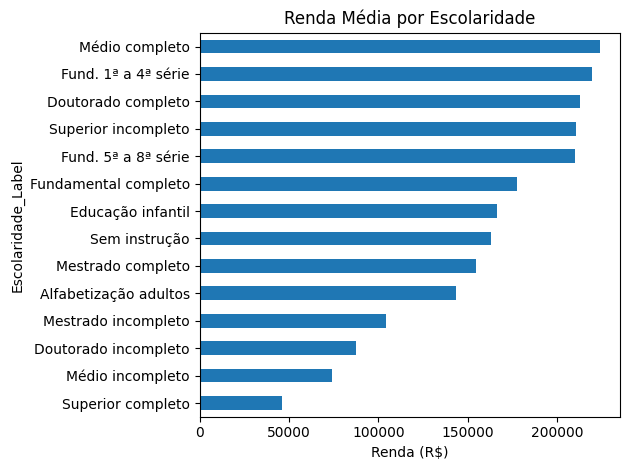

In [68]:
# Escolaridade X Renda
df.groupby('Escolaridade_Label')['Renda_Total'].mean().sort_values().plot(kind='barh')
plt.title('Renda Média por Escolaridade')
plt.xlabel('Renda (R$)')
plt.tight_layout()
plt.show()

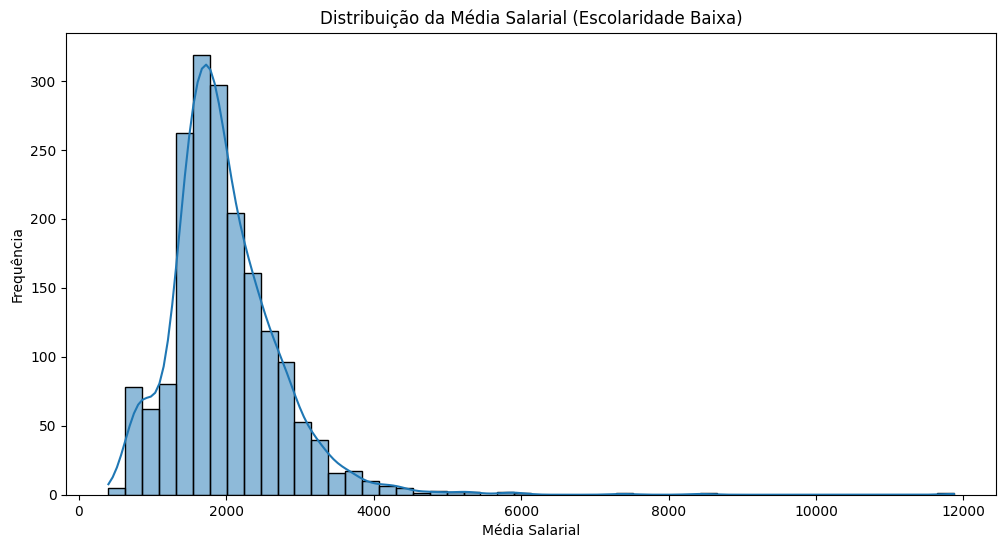

In [69]:
# Filtrar grupos de escolaridade baixa
baixa_escolaridade = rais_df[rais_df['grau_instrucao'].isin([2, 3, 4, 5, 6])]

plt.figure(figsize=(12,6))
sns.histplot(data=baixa_escolaridade, x='media_salarial', bins=50, kde=True)
plt.title("Distribuição da Média Salarial (Escolaridade Baixa)")
plt.xlabel("Média Salarial")
plt.ylabel("Frequência")
plt.show()


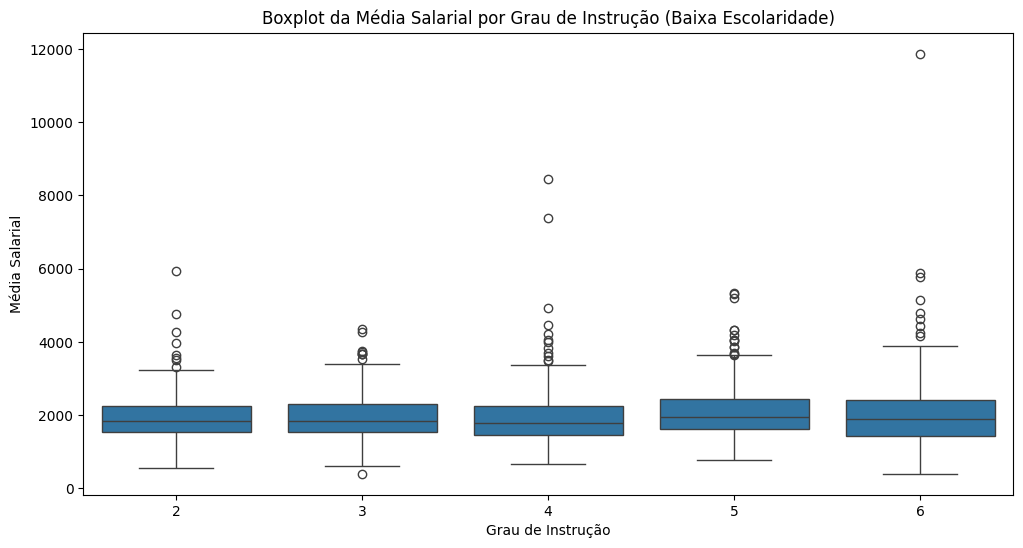

In [70]:
plt.figure(figsize=(12,6))
sns.boxplot(data=baixa_escolaridade, x='grau_instrucao', y='media_salarial')
plt.title("Boxplot da Média Salarial por Grau de Instrução (Baixa Escolaridade)")
plt.xlabel("Grau de Instrução")
plt.ylabel("Média Salarial")
plt.show()


In [71]:
rais_df[rais_df['grau_instrucao'].isin([2,3,4,5,6])]['grau_instrucao'].value_counts()


grau_instrucao
2    371
6    371
5    370
4    368
3    364
Name: count, dtype: int64

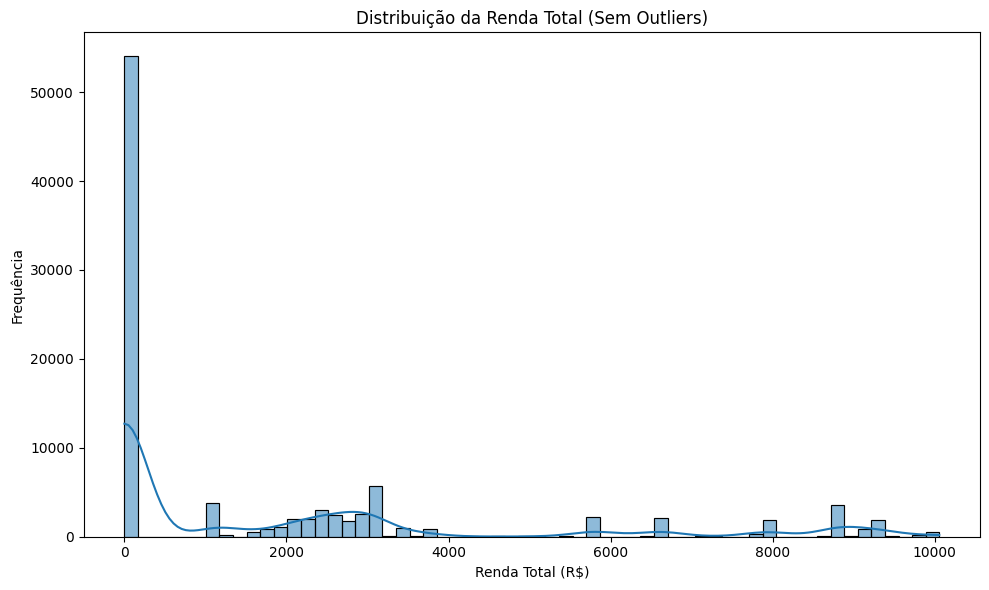

In [72]:
plt.figure(figsize=(10,6))
sns.histplot(pnad_df['Renda_Total_Imputada_Outliers'], bins=60, kde=True)
plt.title("Distribuição da Renda Total (Sem Outliers)")
plt.xlabel("Renda Total (R$)")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()


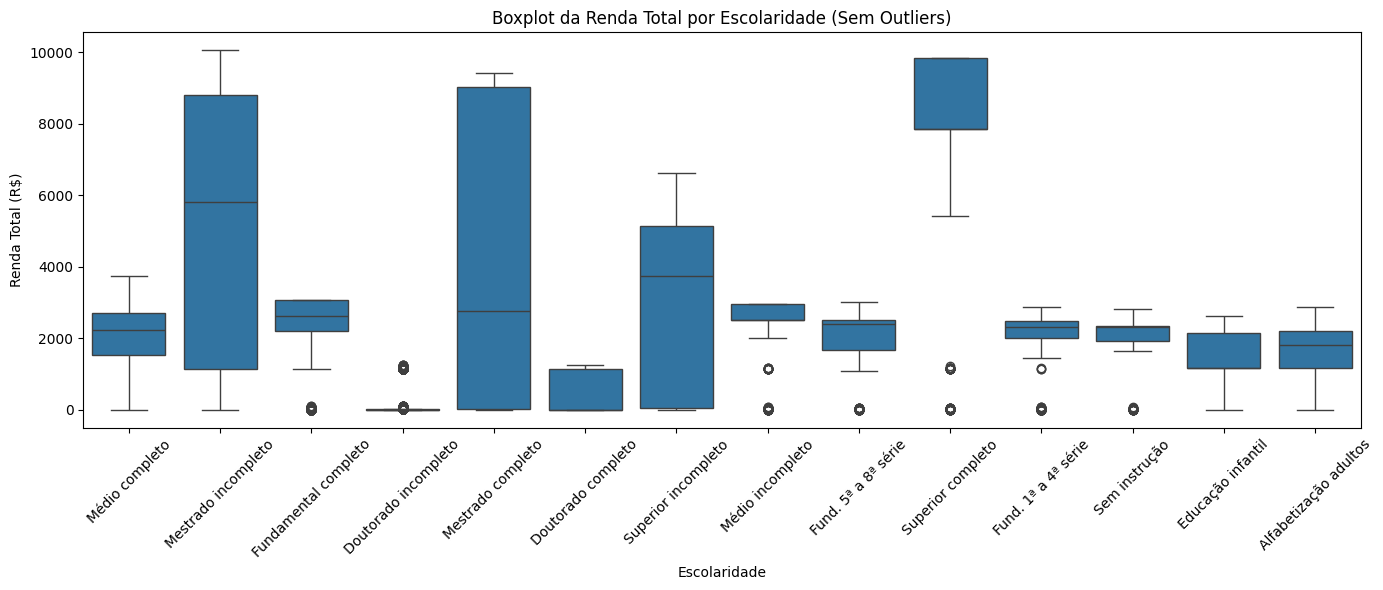

In [73]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Escolaridade_Label', y='Renda_Total_Imputada_Outliers', data=pnad_df)
plt.xticks(rotation=45)
plt.title("Boxplot da Renda Total por Escolaridade (Sem Outliers)")
plt.xlabel("Escolaridade")
plt.ylabel("Renda Total (R$)")
plt.tight_layout()
plt.show()


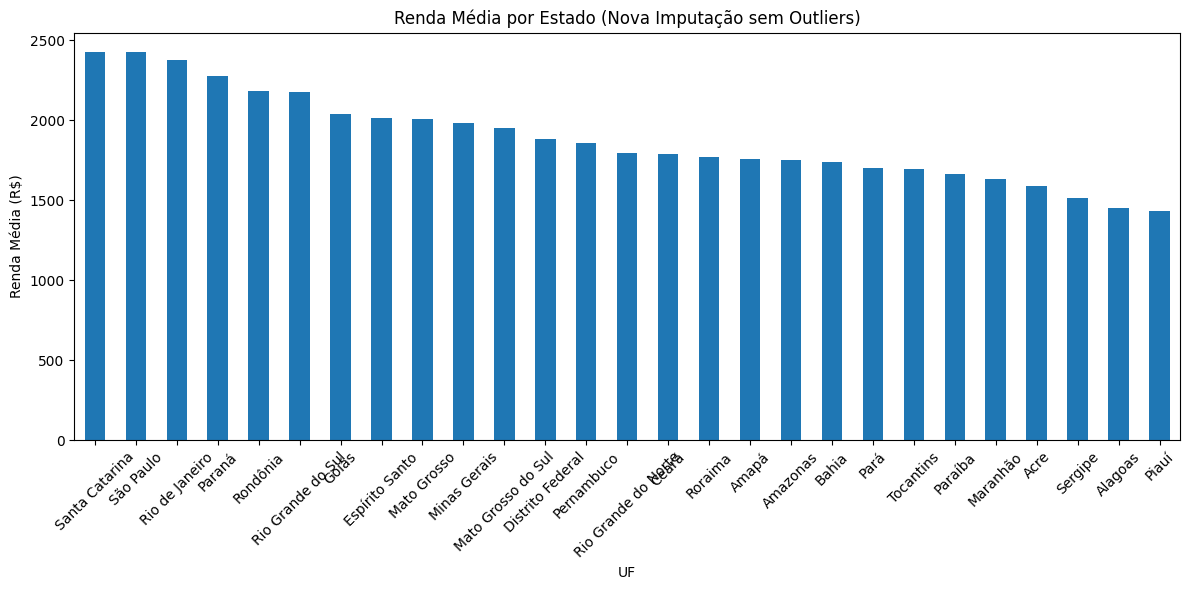

In [74]:
renda_uf = pnad_df.groupby('UF')['Renda_Total_Imputada_Outliers'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
renda_uf.plot(kind='bar')
plt.title("Renda Média por Estado (Nova Imputação sem Outliers)")
plt.ylabel("Renda Média (R$)")
plt.xlabel("UF")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


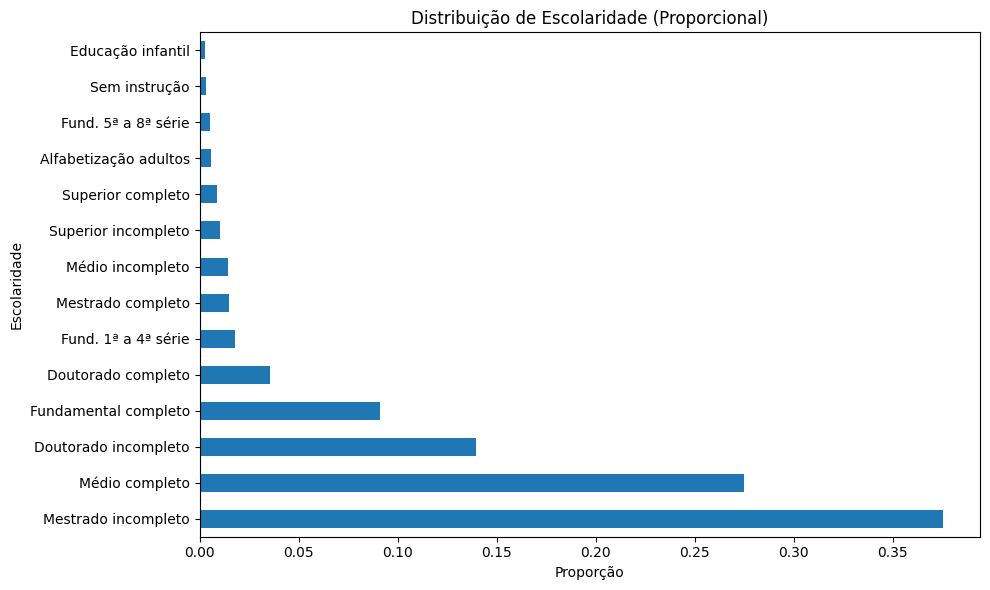

In [75]:
escolaridade_dist = pnad_df['Escolaridade_Label'].value_counts(normalize=True)

plt.figure(figsize=(10,6))
escolaridade_dist.plot(kind='barh')
plt.title("Distribuição de Escolaridade (Proporcional)")
plt.xlabel("Proporção")
plt.ylabel("Escolaridade")
plt.tight_layout()
plt.show()


In [76]:
df['Curso mais elevado frequentado anteriormente'].value_counts(dropna=False)


Curso mais elevado frequentado anteriormente
NaN     34718
10.0    24289
7.0     17800
12.0     9029
5.0      5881
13.0     2311
3.0      1166
11.0      954
6.0       931
8.0       682
9.0       587
14.0      371
4.0       329
2.0       200
15.0      182
1.0        22
Name: count, dtype: int64

In [77]:
map_escolaridade = {
    2: "Sem instrução",
    3: "Fund. 1ª a 4ª série",
    4: "Fund. 5ª a 8ª série",
    5: "Fundamental completo",
    6: "Médio incompleto",
    7: "Médio completo",
    8: "Superior incompleto",
    9: "Superior completo",
    10: "Mestrado incompleto",
    11: "Mestrado completo",
    12: "Doutorado incompleto",
    13: "Doutorado completo",
    14: "Alfabetização adultos",
    15: "Educação infantil"
}



In [78]:
df['Curso mais elevado frequentado anteriormente'].value_counts(dropna=False)

Curso mais elevado frequentado anteriormente
NaN     34718
10.0    24289
7.0     17800
12.0     9029
5.0      5881
13.0     2311
3.0      1166
11.0      954
6.0       931
8.0       682
9.0       587
14.0      371
4.0       329
2.0       200
15.0      182
1.0        22
Name: count, dtype: int64

In [79]:
rais_df['grau_instrucao'].value_counts(normalize=True).sort_index()


grau_instrucao
1     0.094285
2     0.097709
3     0.095865
4     0.096919
5     0.097445
6     0.097709
7     0.099289
8     0.092705
9     0.094285
10    0.075849
11    0.057940
Name: proportion, dtype: float64

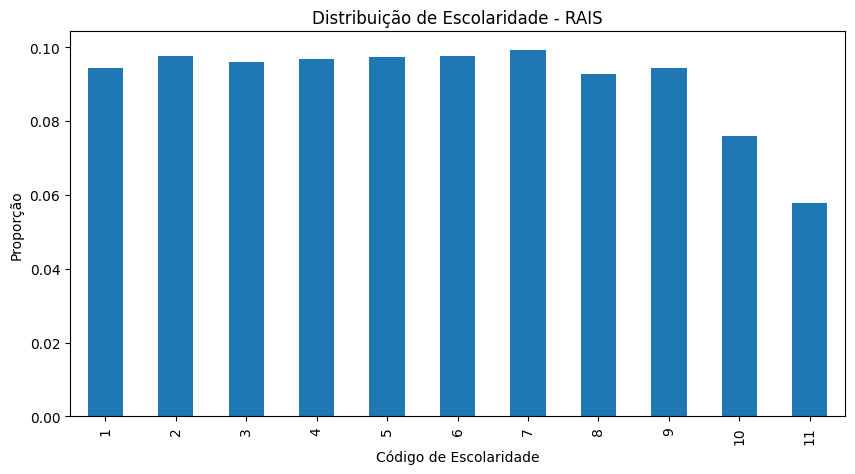

In [80]:


rais_df['grau_instrucao'].value_counts(normalize=True).sort_index().plot(kind='bar', figsize=(10,5), title='Distribuição de Escolaridade - RAIS')
plt.ylabel("Proporção")
plt.xlabel("Código de Escolaridade")
plt.show()


In [81]:
# 1. Distribuição proporcional da RAIS
dist_rais = rais_df['grau_instrucao'].value_counts(normalize=True).sort_index()

# 2. Distribuição proporcional da PNAD (ajuste se for código ou label)
dist_pnad = pnad_df['Escolaridade_Label'].value_counts(normalize=True)

# Para comparar, se necessário, transforme o label para código
map_escolaridade_inv = {v: k for k, v in map_escolaridade.items()}
pnad_df['codigo_escolaridade'] = pnad_df['Escolaridade_Label'].map(map_escolaridade_inv)
dist_pnad_cod = pnad_df['codigo_escolaridade'].value_counts(normalize=True).sort_index()

# 3. Fator de ajuste: RAIS / PNAD
ajuste_pesos = dist_rais / dist_pnad_cod

# 4. Aplicar o fator como peso para a PNAD
# Cria nova coluna de peso
pnad_df['peso_escolaridade'] = pnad_df['codigo_escolaridade'].map(ajuste_pesos)

# Exemplo de uso: média ponderada de renda
renda_ponderada = np.average(pnad_df['Renda_Total_Imputada_Outliers'], weights=pnad_df['peso_escolaridade'])
print(f"Média ponderada da renda com reponderação pela RAIS: R$ {renda_ponderada:.2f}")


Média ponderada da renda com reponderação pela RAIS: R$ nan


In [82]:
pnad_df['Renda_Total_Imputada_Outliers'].isna().sum()


np.int64(3394)

In [83]:
pnad_df['peso_escolaridade'].isna().sum()


np.int64(46633)

In [84]:
print(ajuste_pesos)  # ver se todos os códigos presentes têm valores válidos


1.0           NaN
2.0     31.614633
3.0      5.320434
4.0     19.063215
5.0      1.072247
6.0      6.791543
7.0      0.360965
8.0      8.796350
9.0     10.394154
10.0     0.202082
11.0     3.930235
12.0          NaN
13.0          NaN
14.0          NaN
15.0          NaN
Name: proportion, dtype: float64


In [85]:
dados_validos = pnad_df.dropna(subset=['Renda_Total_Imputada_Outliers', 'peso_escolaridade'])

renda_ponderada = np.average(
    dados_validos['Renda_Total_Imputada_Outliers'],
    weights=dados_validos['peso_escolaridade']
)
print(f"Média ponderada da renda com reponderação pela RAIS: R$ {renda_ponderada:.2f}")


Média ponderada da renda com reponderação pela RAIS: R$ 3200.89


In [86]:
pnad_df[pnad_df['peso_escolaridade'].isna()]['Escolaridade_Label'].value_counts()


Escolaridade_Label
Doutorado incompleto     9029
Doutorado completo       2311
Alfabetização adultos     371
Educação infantil         182
Name: count, dtype: int64

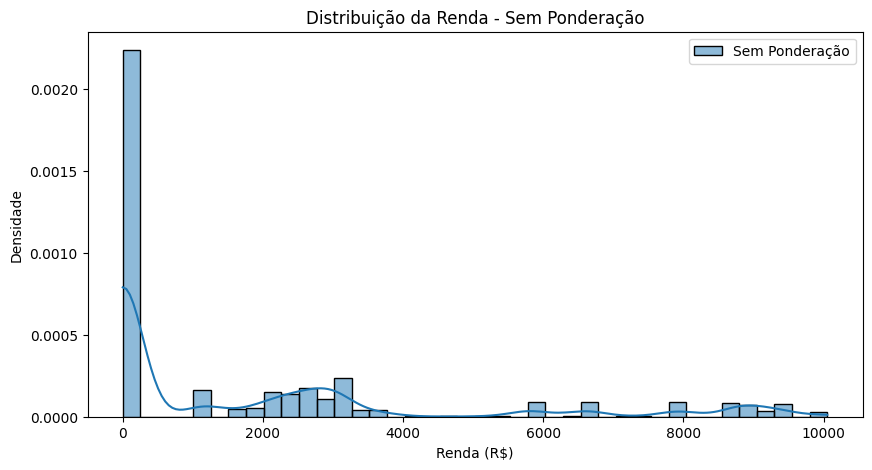

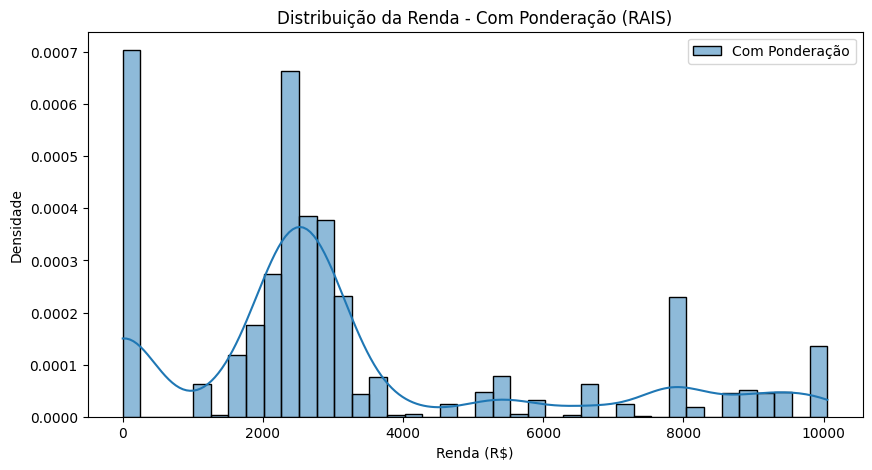

In [87]:
# Sem ponderação
plt.figure(figsize=(10,5))
sns.histplot(pnad_df['Renda_Total_Imputada_Outliers'].dropna(), kde=True, stat='density', bins=40, label='Sem Ponderação')
plt.title('Distribuição da Renda - Sem Ponderação')
plt.xlabel('Renda (R$)')
plt.ylabel('Densidade')
plt.legend()
plt.show()

# Com ponderação
plt.figure(figsize=(10,5))
sns.histplot(data=pnad_df.dropna(subset=['Renda_Total_Imputada_Outliers', 'peso_escolaridade']),
             x='Renda_Total_Imputada_Outliers',
             weights='peso_escolaridade',
             kde=True, stat='density', bins=40, label='Com Ponderação')
plt.title('Distribuição da Renda - Com Ponderação (RAIS)')
plt.xlabel('Renda (R$)')
plt.ylabel('Densidade')
plt.legend()
plt.show()


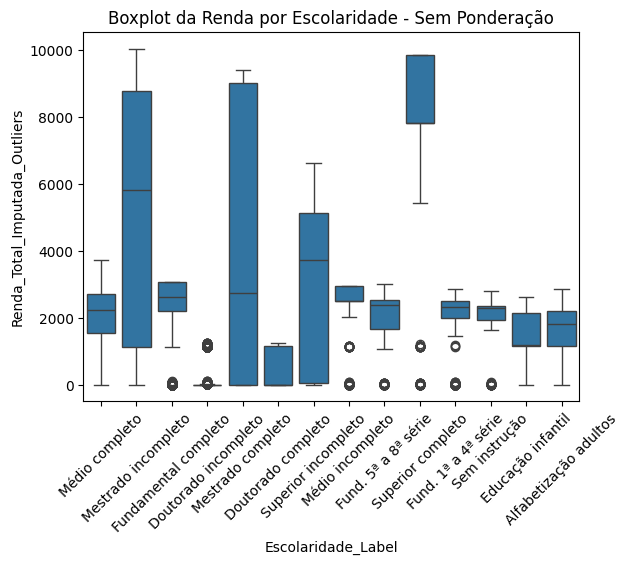

In [88]:
# Boxplot antes
sns.boxplot(data=pnad_df, x='Escolaridade_Label', y='Renda_Total_Imputada_Outliers')
plt.xticks(rotation=45)
plt.title("Boxplot da Renda por Escolaridade - Sem Ponderação")
plt.show()

# Boxplot depois (com peso usado só na média, mas gráfico continua o mesmo)
# Aqui é opcional, pois boxplot não leva peso, mas ajuda mostrar variações


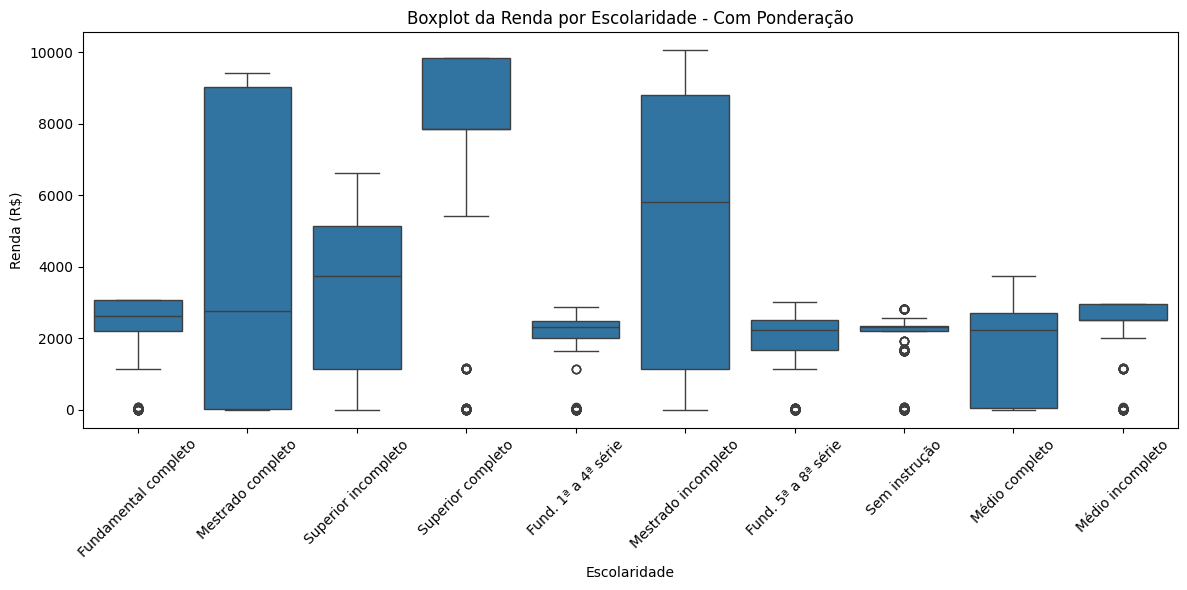

In [89]:
# Remover valores nulos para segurança
pnad_validos = pnad_df.dropna(subset=['Renda_Total_Imputada_Outliers', 'peso_escolaridade', 'Escolaridade_Label'])

# Amostragem com base no peso (repetição proporcional)
df_amostrado = pnad_validos.sample(
    n=5000,  # você pode ajustar esse número se quiser maior fidelidade
    weights=pnad_validos['peso_escolaridade'],
    replace=True,
    random_state=42
)

# Boxplot com dados reponderados
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_amostrado, x='Escolaridade_Label', y='Renda_Total_Imputada_Outliers')
plt.xticks(rotation=45)
plt.title('Boxplot da Renda por Escolaridade - Com Ponderação')
plt.ylabel('Renda (R$)')
plt.xlabel('Escolaridade')
plt.tight_layout()
plt.show()

/tmp/ipykernel_36233/810439220.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  media_uf_com = pnad_validos_uf.groupby('UF').apply(


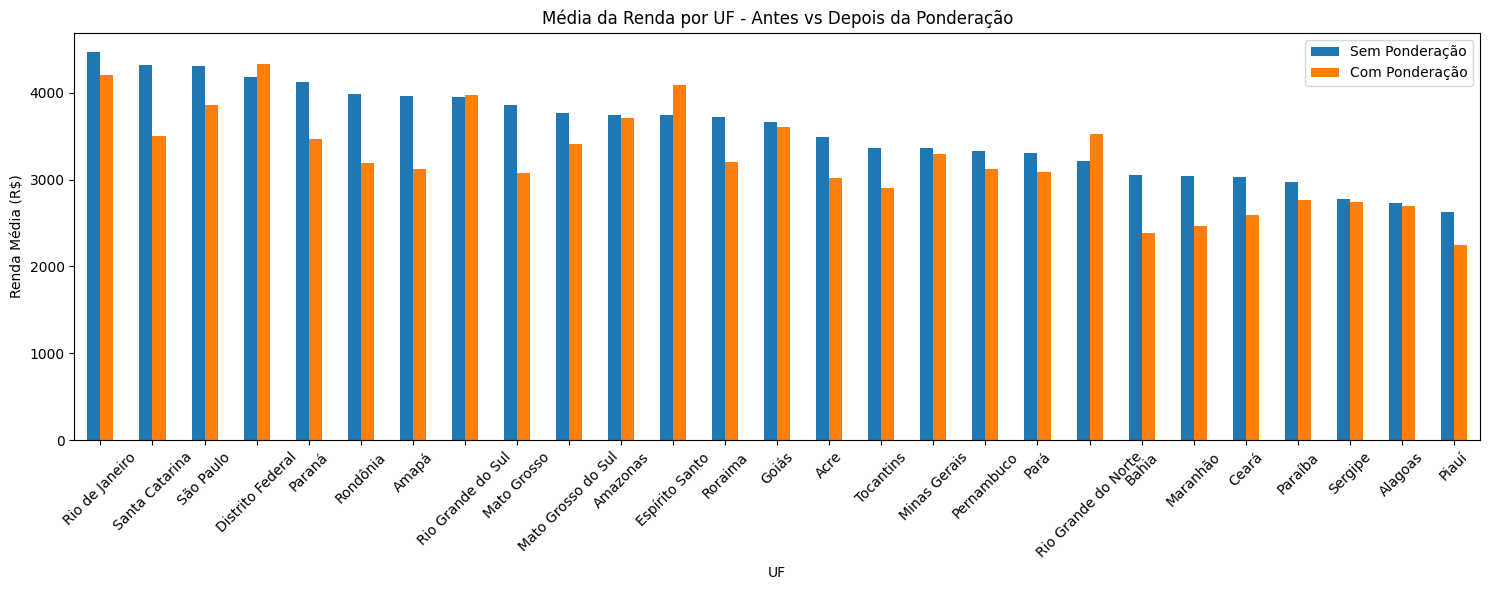

In [90]:
# Remover nulos necessários
pnad_validos_uf = pnad_df.dropna(subset=['Renda_Total_Imputada_Outliers', 'peso_escolaridade', 'UF'])

# Média sem ponderação
media_uf_sem = pnad_validos_uf.groupby('UF')['Renda_Total_Imputada_Outliers'].mean()

# Média com ponderação
media_uf_com = pnad_validos_uf.groupby('UF').apply(
    lambda x: np.average(x['Renda_Total_Imputada_Outliers'], weights=x['peso_escolaridade'])
)

# Combinar em um DataFrame
media_uf_comparativo = pd.DataFrame({
    'Sem Ponderação': media_uf_sem,
    'Com Ponderação': media_uf_com
}).sort_values('Sem Ponderação', ascending=False)

# Gráfico
media_uf_comparativo.plot(kind='bar', figsize=(15, 6))
plt.title('Média da Renda por UF - Antes vs Depois da Ponderação')
plt.ylabel('Renda Média (R$)')
plt.xlabel('UF')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [91]:
# Dicionário CNAE - Seções (nível mais agregado)
cnae_secoes = {
    'A': 'Agropecuária, Florestal, Pesca e Aquicultura',
    'B': 'Indústrias Extrativas',
    'C': 'Indústrias de Transformação',
    'D': 'Eletricidade e Gás',
    'E': 'Água, Esgoto e Resíduos',
    'F': 'Construção',
    'G': 'Comércio e Reparação de Veículos',
    'H': 'Transporte e Correio',
    'I': 'Alojamento e Alimentação',
    'J': 'Informação e Comunicação',
    'K': 'Financeiras e Seguros',
    'L': 'Atividades Imobiliárias',
    'M': 'Atividades Profissionais e Técnicas',
    'N': 'Atividades Administrativas e Serviços',
    'O': 'Administração Pública',
    'P': 'Educação',
    'Q': 'Saúde Humana e Assistência Social',
    'R': 'Artes, Cultura e Esporte',
    'S': 'Outros Serviços',
    'T': 'Serviços Domésticos',
    'U': 'Organismos Internacionais'
}



In [92]:
pnad_df['Setor_Economico'] = pnad_df['Seção da atividade'].astype(str).str.upper().str.strip().map(cnae_secoes)



In [93]:
print(pnad_df['Setor_Economico'].value_counts(dropna=False))


Setor_Economico
NaN    99452
Name: count, dtype: int64


In [94]:
pnad_df['Setor_Economico'] = pnad_df['Setor_Economico'].fillna('Desconhecido')


In [95]:
pnad_df.groupby('Setor_Economico')['Renda_Total_Imputada_Outliers'].mean().sort_values(ascending=False)


Setor_Economico
Desconhecido    1884.926018
Name: Renda_Total_Imputada_Outliers, dtype: float64

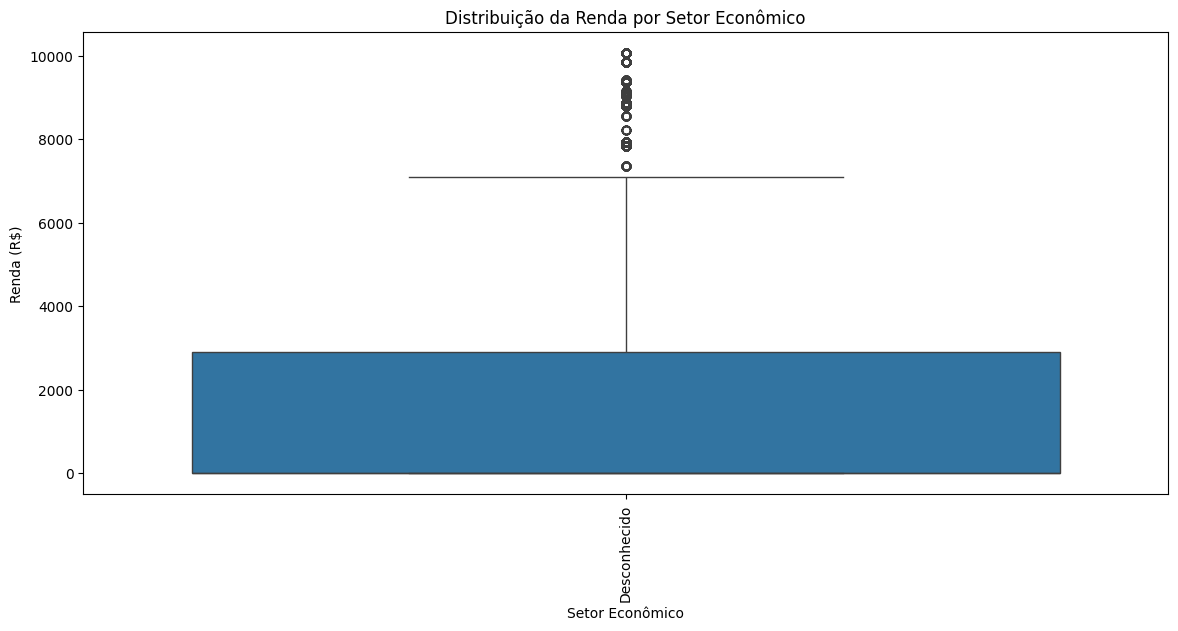

In [96]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=pnad_df, x='Setor_Economico', y='Renda_Total_Imputada_Outliers')
plt.xticks(rotation=90)
plt.title('Distribuição da Renda por Setor Econômico')
plt.ylabel('Renda (R$)')
plt.xlabel('Setor Econômico')
plt.show()


In [97]:
print(pnad_df.columns.tolist())


['Ano', 'Trimestre', 'UF', 'Capital', 'RM_RIDE', 'UPA', 'Estrato', 'Selecao_Domicilio', 'Painel', 'Situacao_Domicilio', 'Tipo de área (1 - Urbana, 2 - Rural)', 'Projeção da população por níveis geográficos', 'Peso do domicílio e das pessoas', 'Peso do domicílio e das pessoas (com correção)', 'Projeção da população por sexo e idade', 'Domínios de projeção geográficos', 'Domínios de projeção por sexo e idade', 'Número de pessoas no domicílio', 'Número de ordem dos moradores', 'Condição no domicílio', 'Sexo', 'Dia de nascimento (01 a 31)', 'Mês de nascimento (01 a 12)', 'Ano de nascimento', 'Idade do morador na data de referência', 'Cor_Raca', 'Sabe ler e escrever? (1 - Sim, 2 - Não)', 'Frequenta escola? (1 - Sim, 2 - Não)', 'Tipo de escola frequentada (1 - Pública, 2 - Privada)', 'Curso frequentado (01 - Pré-escola, 02 - Ensino Fundamental, etc.)', 'Tipo de organização do curso (1 - Anos, 2 - Períodos semestrais)', 'Ano/Série que frequenta', 'Ensino fundamental regular ou EJA? (1 - Sim, 

In [98]:
pnad_df['Faixa_Idade'] = pd.cut(
    pnad_df['Idade do morador na data de referência'],
    bins=[0, 17, 25, 35, 45, 55, 65, 100],
    labels=[
        'Até 17', '18-25', '26-35', '36-45',
        '46-55', '56-65', '65+'
    ]
)

pnad_df.rename(columns={'Idade do morador na data de referência': 'idade'}, inplace=True)


/tmp/ipykernel_36233/734780260.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_renda = pnad_df.groupby(['Escolaridade_Label', 'Faixa_Idade'])['Renda_Total_Imputada_Outliers'].mean().unstack()


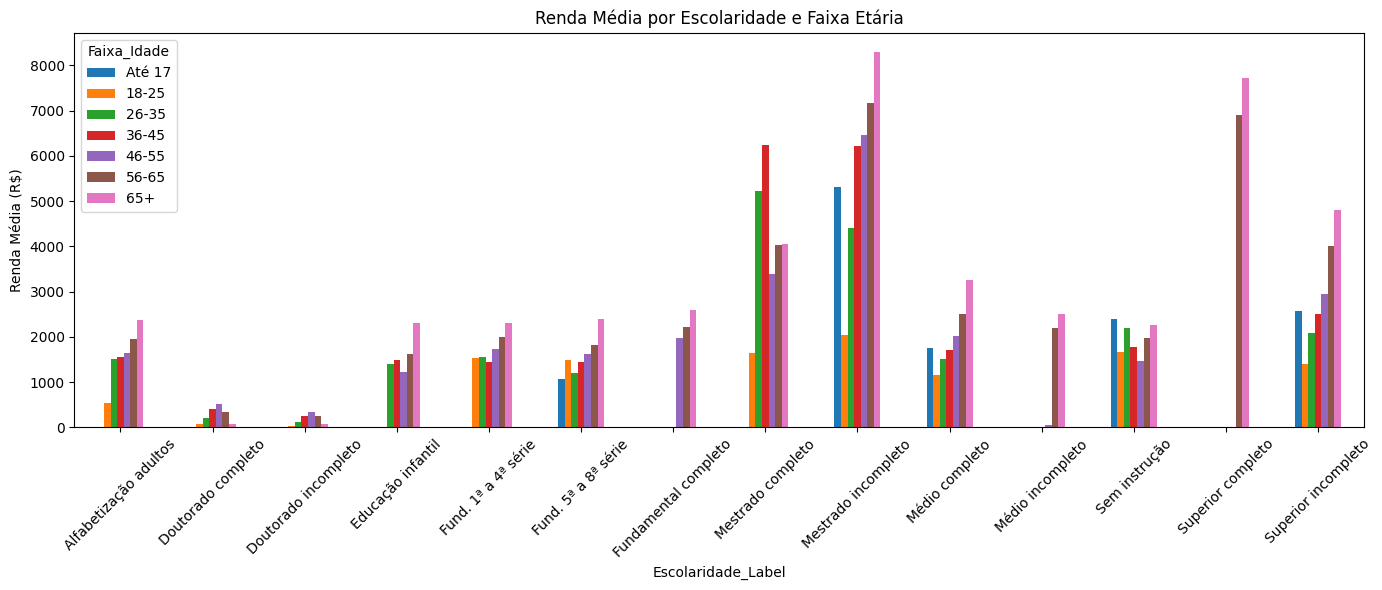

In [99]:
media_renda = pnad_df.groupby(['Escolaridade_Label', 'Faixa_Idade'])['Renda_Total_Imputada_Outliers'].mean().unstack()
media_renda.plot(kind='bar', figsize=(14, 6))
plt.ylabel('Renda Média (R$)')
plt.title('Renda Média por Escolaridade e Faixa Etária')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


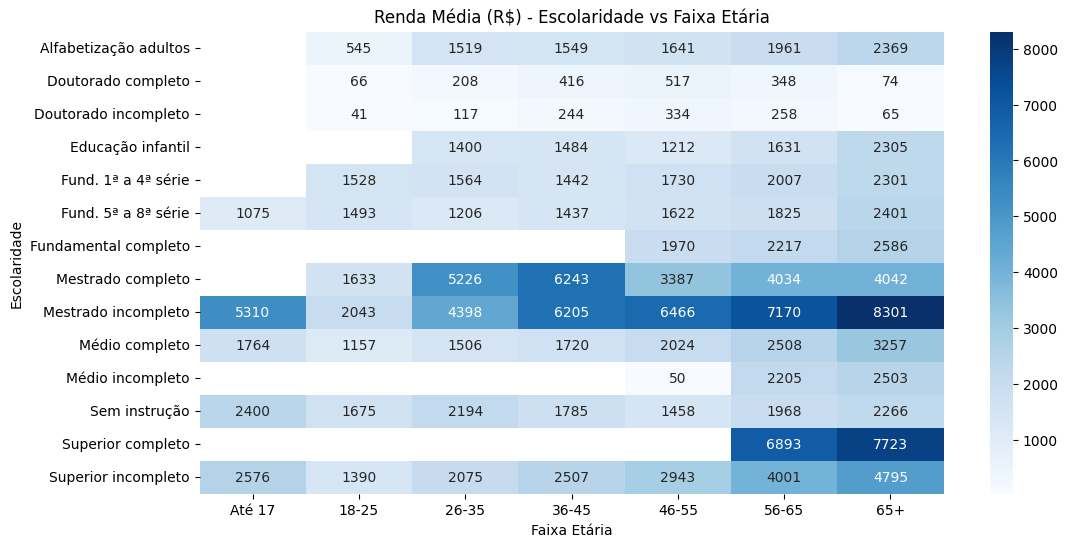

In [100]:
plt.figure(figsize=(12, 6))
sns.heatmap(media_renda, annot=True, fmt=".0f", cmap="Blues")
plt.title('Renda Média (R$) - Escolaridade vs Faixa Etária')
plt.ylabel('Escolaridade')
plt.xlabel('Faixa Etária')
plt.show()

In [101]:
pnad_df.groupby(['Escolaridade_Label', 'Faixa_Idade']).size().unstack(fill_value=0)


/tmp/ipykernel_36233/796521192.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pnad_df.groupby(['Escolaridade_Label', 'Faixa_Idade']).size().unstack(fill_value=0)


Faixa_Idade,Até 17,18-25,26-35,36-45,46-55,56-65,65+
Escolaridade_Label,,,,,,,
Alfabetização adultos,0,3,71,104,81,66,46
Doutorado completo,0,36,473,726,551,347,178
Doutorado incompleto,0,760,2535,2323,1486,1091,834
Educação infantil,0,0,26,56,36,36,28
Fund. 1ª a 4ª série,0,7,17,82,205,305,547
Fund. 5ª a 8ª série,1,2,15,36,72,79,124
Fundamental completo,0,0,0,0,306,2090,3481
Mestrado completo,0,122,223,228,199,123,59
Mestrado incompleto,215,5693,6340,5381,3603,2186,870


In [102]:
proporcoes = (
    pnad_df.groupby(['Escolaridade_Label', 'Faixa_Idade'])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())
)


/tmp/ipykernel_36233/837480294.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pnad_df.groupby(['Escolaridade_Label', 'Faixa_Idade'])


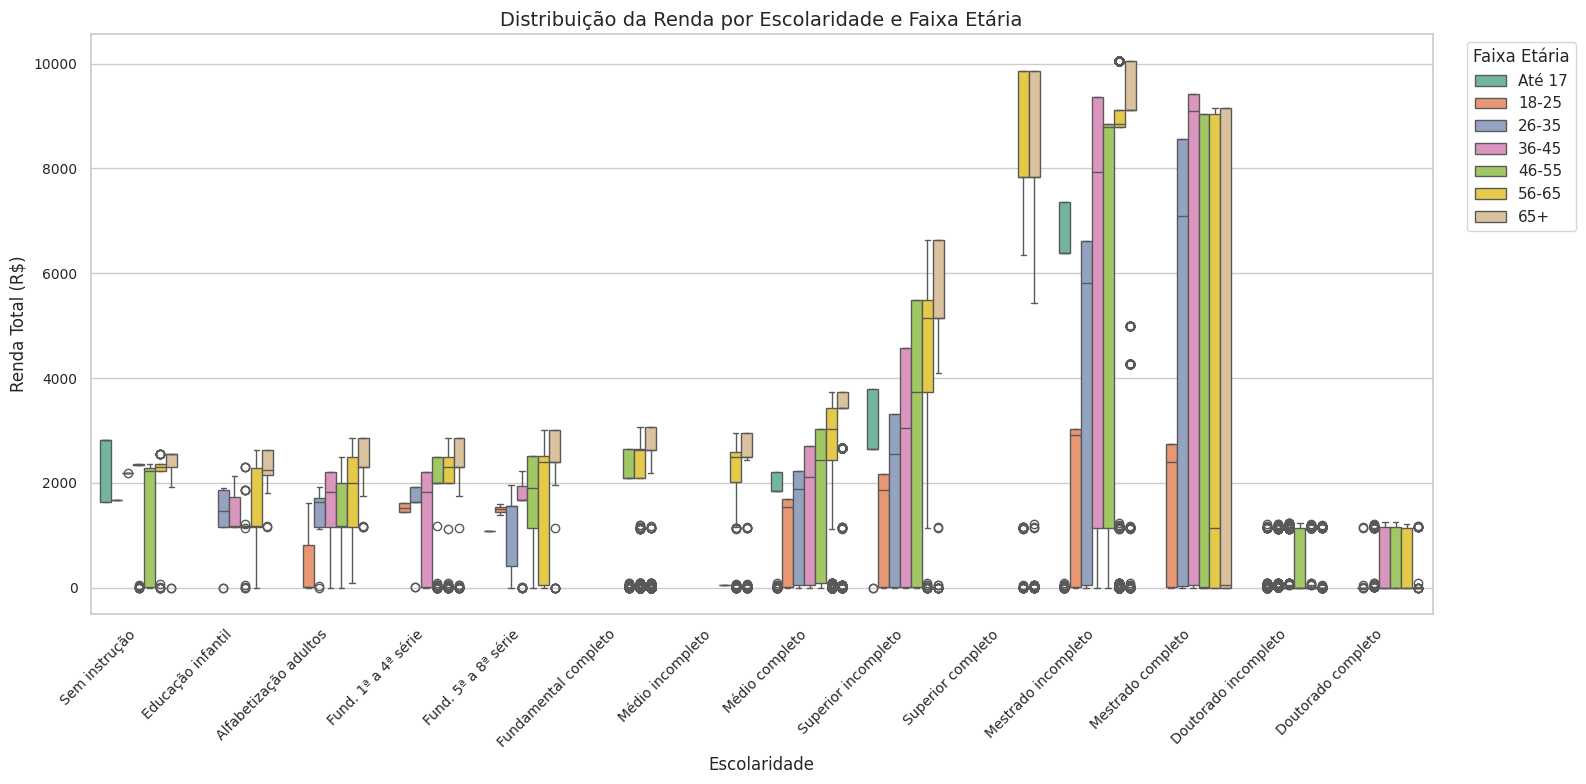

In [103]:
# Define a ordem desejada para a escolaridade
ordem_escolaridade = [
    'Sem instrução', 'Educação infantil', 'Alfabetização adultos',
    'Fund. 1ª a 4ª série', 'Fund. 5ª a 8ª série', 'Fundamental completo',
    'Médio incompleto', 'Médio completo',
    'Superior incompleto', 'Superior completo',
    'Mestrado incompleto', 'Mestrado completo',
    'Doutorado incompleto', 'Doutorado completo'
]

# Garante que a escolaridade siga a ordem definida
pnad_df['Escolaridade_Label'] = pd.Categorical(
    pnad_df['Escolaridade_Label'],
    categories=ordem_escolaridade,
    ordered=True
)

# Define o estilo e paleta de cores
sns.set(style="whitegrid")
sns.set_palette("Set2")

# Cria o gráfico
plt.figure(figsize=(16, 8))
sns.boxplot(
    data=pnad_df,
    x='Escolaridade_Label',
    y='Renda_Total_Imputada_Outliers',
    hue='Faixa_Idade'
)

# Ajustes visuais
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Escolaridade', fontsize=12)
plt.ylabel('Renda Total (R$)', fontsize=12)
plt.title('Distribuição da Renda por Escolaridade e Faixa Etária', fontsize=14)
plt.legend(title='Faixa Etária', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()

# Exibe o gráfico
plt.show()

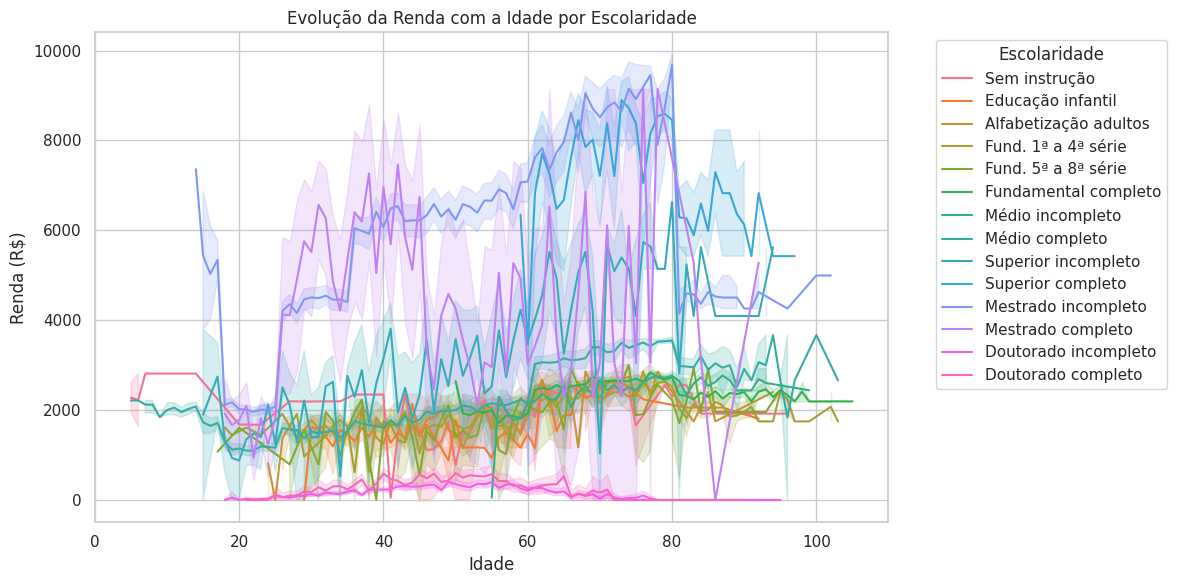

In [104]:
plt.figure(figsize=(12,6))
sns.lineplot(data=pnad_df, x='idade', y='Renda_Total_Imputada_Outliers', hue='Escolaridade_Label')
plt.title('Evolução da Renda com a Idade por Escolaridade')
plt.ylabel('Renda (R$)')
plt.xlabel('Idade')
plt.legend(title='Escolaridade', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


In [105]:
faixa_dominante = pnad_df.groupby('Escolaridade_Label')['Faixa_Idade'].agg(lambda x: x.value_counts().idxmax())
display(faixa_dominante)


/tmp/ipykernel_36233/222059377.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  faixa_dominante = pnad_df.groupby('Escolaridade_Label')['Faixa_Idade'].agg(lambda x: x.value_counts().idxmax())


Escolaridade_Label
Sem instrução            46-55
Educação infantil        36-45
Alfabetização adultos    36-45
Fund. 1ª a 4ª série        65+
Fund. 5ª a 8ª série        65+
Fundamental completo       65+
Médio incompleto           65+
Médio completo           46-55
Superior incompleto      46-55
Superior completo          65+
Mestrado incompleto      26-35
Mestrado completo        36-45
Doutorado incompleto     26-35
Doutorado completo       36-45
Name: Faixa_Idade, dtype: category
Categories (7, object): ['Até 17' < '18-25' < '26-35' < '36-45' < '46-55' < '56-65' < '65+']

In [106]:
pnad_df.groupby('Escolaridade_Label')['Renda_Total_Imputada_Outliers'].std().sort_values(ascending=False)


/tmp/ipykernel_36233/400220384.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pnad_df.groupby('Escolaridade_Label')['Renda_Total_Imputada_Outliers'].std().sort_values(ascending=False)


Escolaridade_Label
Mestrado completo        4174.088784
Mestrado incompleto      3623.551187
Superior completo        2662.382607
Superior incompleto      2226.163531
Médio completo           1202.530659
Fund. 5ª a 8ª série       995.510863
Sem instrução             924.022024
Fund. 1ª a 4ª série       845.201057
Fundamental completo      839.836244
Médio incompleto          792.478904
Alfabetização adultos     641.382695
Educação infantil         614.007560
Doutorado completo        532.067675
Doutorado incompleto      424.577652
Name: Renda_Total_Imputada_Outliers, dtype: float64

/tmp/ipykernel_36233/1975184371.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=pnad_df[pnad_df['Escolaridade_Label'] == label],


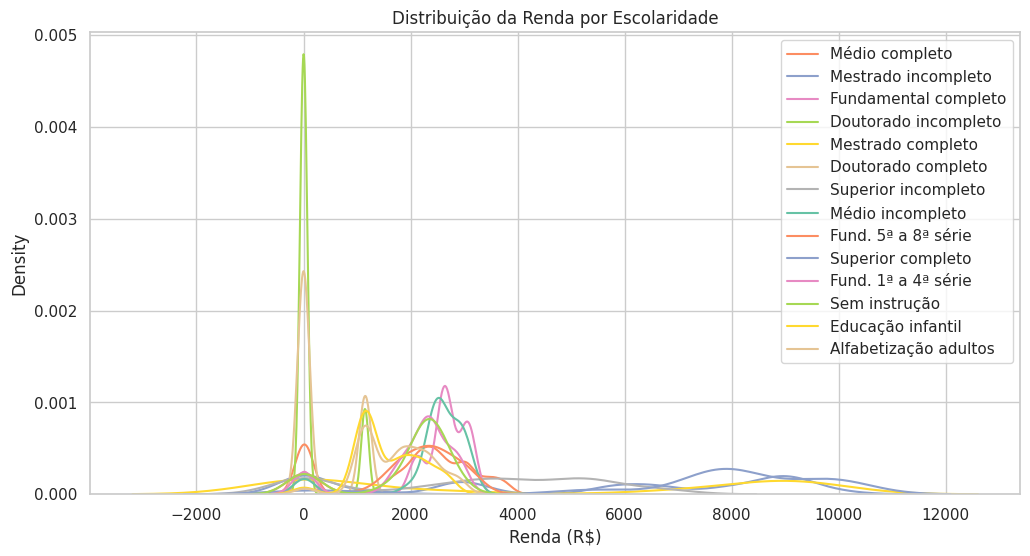

In [107]:
plt.figure(figsize=(12, 6))
for label in pnad_df['Escolaridade_Label'].unique():
    sns.kdeplot(data=pnad_df[pnad_df['Escolaridade_Label'] == label],
                x='Renda_Total_Imputada_Outliers', label=label)
plt.title('Distribuição da Renda por Escolaridade')
plt.xlabel('Renda (R$)')
plt.legend()
plt.show()


In [108]:
renda_uf = pnad_df.groupby('sigla_uf')['Renda_Total_Imputada_Outliers'].mean().reset_index()
renda_uf.columns = ['sigla_uf', 'renda_media']


In [109]:
fig = px.choropleth(
    renda_uf,
    geojson='https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson',
    locations='sigla_uf',
    color='renda_media',
    color_continuous_scale="YlGnBu",
    scope="south america",
    featureidkey="properties.sigla"  # depende do arquivo geojson
)

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title="Renda Média por Estado (UF)", margin={"r":0,"t":30,"l":0,"b":0})
# fig.show(renderer='browser')


In [110]:
dados_es = pnad_df[pnad_df['sigla_uf'] == 'ES']


In [111]:
dados_es.groupby('Escolaridade_Label')['Renda_Total_Imputada_Outliers'].mean().sort_values(ascending=False)


/tmp/ipykernel_36233/799315870.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Escolaridade_Label
Superior completo        7412.948286
Mestrado incompleto      5163.363517
Mestrado completo        5025.315315
Superior incompleto      3665.466733
Fundamental completo     2559.716883
Médio incompleto         2415.048019
Sem instrução            2350.270381
Fund. 5ª a 8ª série      2336.575485
Fund. 1ª a 4ª série      2129.333562
Médio completo           1906.271425
Alfabetização adultos    1641.819434
Educação infantil        1488.342773
Doutorado completo        240.064935
Doutorado incompleto      154.377522
Name: Renda_Total_Imputada_Outliers, dtype: float64

In [112]:
dados_es.groupby('sexo')['Renda_Total_Imputada_Outliers'].mean()


sexo
1    2106.066888
2    1937.963568
Name: Renda_Total_Imputada_Outliers, dtype: float64

In [113]:
dados_es.groupby('faixa_etaria')['Renda_Total_Imputada_Outliers'].mean()


faixa_etaria
0-17       94.792534
18-25    1161.515961
26-35    2410.663666
36-45    3106.569745
46-60    3001.430253
61-80    2950.968403
81+      1746.755593
Name: Renda_Total_Imputada_Outliers, dtype: float64

Text(0.5, 1.0, 'Distribuição de Renda por Escolaridade e Gênero - ES')

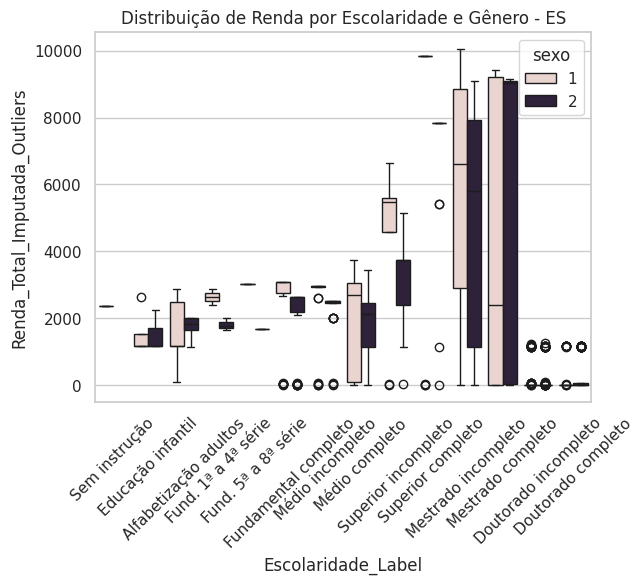

In [114]:
sns.boxplot(data=dados_es, x='Escolaridade_Label', y='Renda_Total_Imputada_Outliers', hue='sexo')
plt.xticks(rotation=45)
plt.title('Distribuição de Renda por Escolaridade e Gênero - ES')


In [115]:
dados_rais_es = rais_df[rais_df['sigla_uf'] == 'ES']
dados_rais_es['sexo'].value_counts(normalize=True) * 100


sexo
2    51.034483
1    48.965517
Name: proportion, dtype: float64

In [116]:
dados_rais_es.groupby('grau_instrucao')['media_salarial'].mean().sort_values(ascending=False)


grau_instrucao
11    7523.677884
10    6811.566637
9     6471.987083
8     3662.662718
7     2673.588837
2     2221.209730
4     2017.489651
5     1811.106594
6     1802.482184
3     1599.742822
1     1552.389903
Name: media_salarial, dtype: float64

In [117]:
dados_rais_es['faixa_etaria'].value_counts()


faixa_etaria
0-17     22
26-35    22
18-25    22
36-45    22
46-60    21
61-80    20
81+      16
Name: count, dtype: int64

In [118]:
media_nacional = rais_df['media_salarial'].mean()
media_es = dados_rais_es['media_salarial'].mean()
print(f"Média salarial nacional: R$ {media_nacional:.2f}")
print(f"Média salarial no ES: R$ {media_es:.2f}")


Média salarial nacional: R$ 3386.31
Média salarial no ES: R$ 3320.52


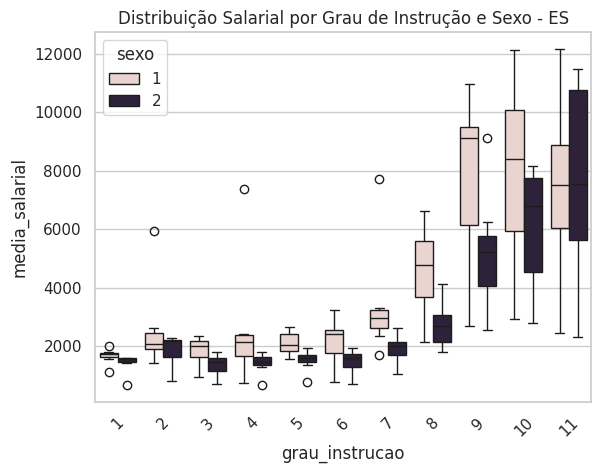

In [119]:
sns.boxplot(data=dados_rais_es, x='grau_instrucao', y='media_salarial', hue='sexo')
plt.xticks(rotation=45)
plt.title('Distribuição Salarial por Grau de Instrução e Sexo - ES')
plt.show()


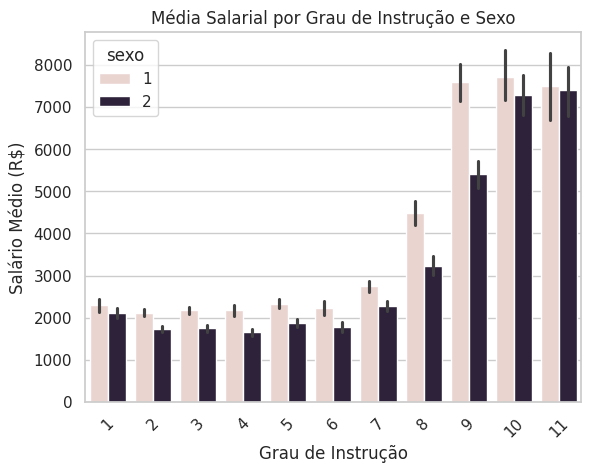

In [120]:
sns.barplot(
    data=rais_df,
    x='grau_instrucao',
    y='media_salarial',
    hue='sexo'
)
plt.title('Média Salarial por Grau de Instrução e Sexo')
plt.xticks(rotation=45)
plt.ylabel('Salário Médio (R$)')
plt.xlabel('Grau de Instrução')
plt.show()


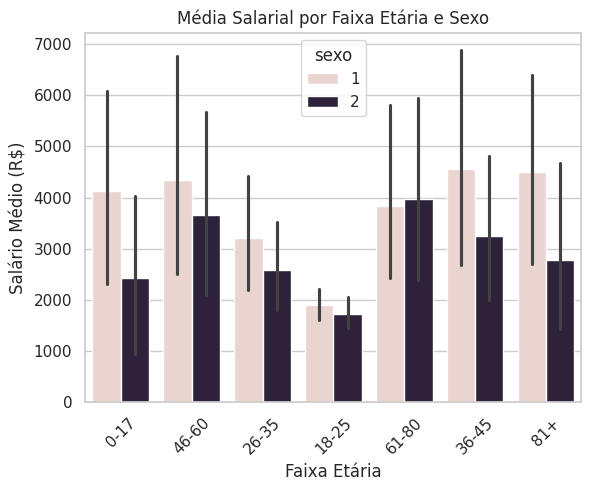

In [121]:
sns.barplot(
    data=dados_rais_es,
    x='faixa_etaria',
    y='media_salarial',
    hue='sexo'
)
plt.title('Média Salarial por Faixa Etária e Sexo')
plt.xticks(rotation=45)
plt.ylabel('Salário Médio (R$)')
plt.xlabel('Faixa Etária')
plt.show()


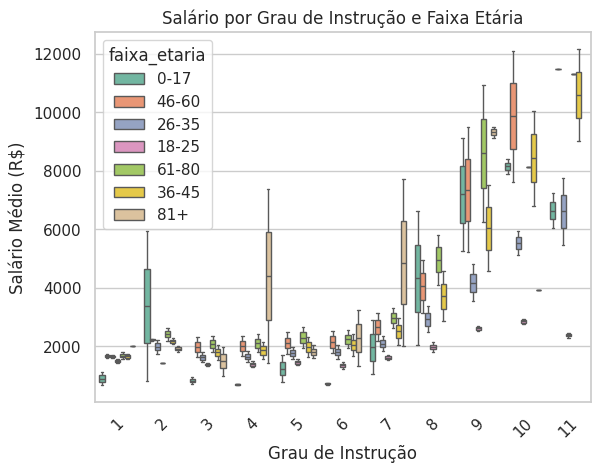

In [122]:
sns.boxplot(
    data=dados_rais_es,
    x='grau_instrucao',
    y='media_salarial',
    hue='faixa_etaria'
)
plt.title('Salário por Grau de Instrução e Faixa Etária')
plt.xticks(rotation=45)
plt.ylabel('Salário Médio (R$)')
plt.xlabel('Grau de Instrução')
plt.show()


In [133]:
# Função para calcular o índice de Gini
def calcular_indice_gini(renda_array):
    """Calcula o índice de Gini a partir de um array de rendas."""
    renda = np.sort(renda_array)
    n = len(renda)
    index = np.arange(1, n + 1)
    gini = (2 * np.sum(index * renda)) / (n * np.sum(renda)) - (n + 1) / n
    return gini

# Usar pnad_df como base (com renda > 0)
pnad_valid = pnad_df[pnad_df['Renda_Total'] > 0].copy()

# Gini geral
gini_geral = calcular_indice_gini(pnad_valid['Renda_Total'].values)
print(f"Índice de Gini Geral: {gini_geral:.4f}")



Índice de Gini Geral: 0.9168


In [135]:
# Dicionário mapeando UFs para macrorregiões
uf_para_macrorregiao = {
    'Rondônia': 'Norte', 'Acre': 'Norte', 'Amazonas': 'Norte',
    'Roraima': 'Norte', 'Pará': 'Norte', 'Amapá': 'Norte', 'Tocantins': 'Norte',
    
    'Maranhão': 'Nordeste', 'Piauí': 'Nordeste', 'Ceará': 'Nordeste',
    'Rio Grande do Norte': 'Nordeste', 'Paraíba': 'Nordeste',
    'Pernambuco': 'Nordeste', 'Alagoas': 'Nordeste', 'Sergipe': 'Nordeste',
    'Bahia': 'Nordeste',
    
    'Minas Gerais': 'Sudeste', 'Espírito Santo': 'Sudeste',
    'Rio de Janeiro': 'Sudeste', 'São Paulo': 'Sudeste',
    
    'Paraná': 'Sul', 'Santa Catarina': 'Sul', 'Rio Grande do Sul': 'Sul',
    
    'Mato Grosso do Sul': 'Centro-Oeste', 'Mato Grosso': 'Centro-Oeste',
    'Goiás': 'Centro-Oeste', 'Distrito Federal': 'Centro-Oeste'
}

# Criar nova coluna com a macrorregião
pnad_valid['Macrorregiao'] = pnad_valid['UF'].map(uf_para_macrorregiao)



In [136]:
# Cálculo do Gini por macrorregião
gini_macros = pnad_valid.groupby('Macrorregiao')['Renda_Total'].apply(
    lambda x: calcular_indice_gini(x.values)
).sort_values()

print("Índice de Gini por Macrorregião:")
print(gini_macros.round(4))


Índice de Gini por Macrorregião:
Macrorregiao
Sul             0.8583
Norte           0.8828
Sudeste         0.9132
Nordeste        0.9405
Centro-Oeste    0.9453
Name: Renda_Total, dtype: float64


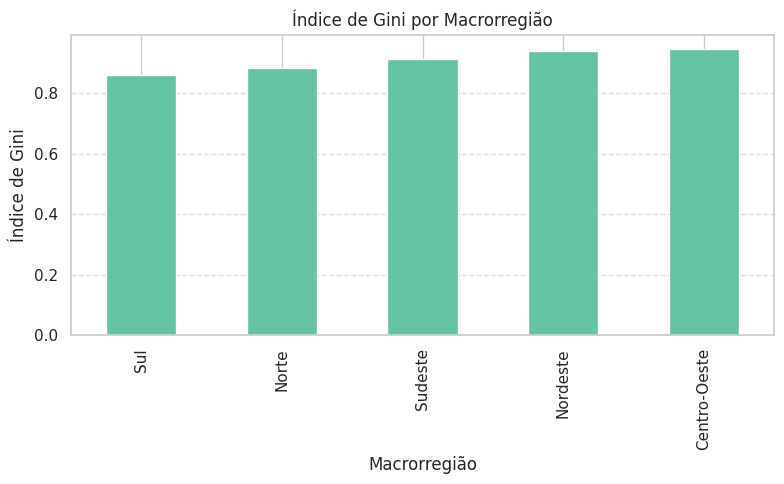

In [137]:
gini_macros.plot(kind='bar', figsize=(8,5))
plt.title('Índice de Gini por Macrorregião')
plt.ylabel('Índice de Gini')
plt.xlabel('Macrorregião')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/tmp/ipykernel_36233/61035068.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



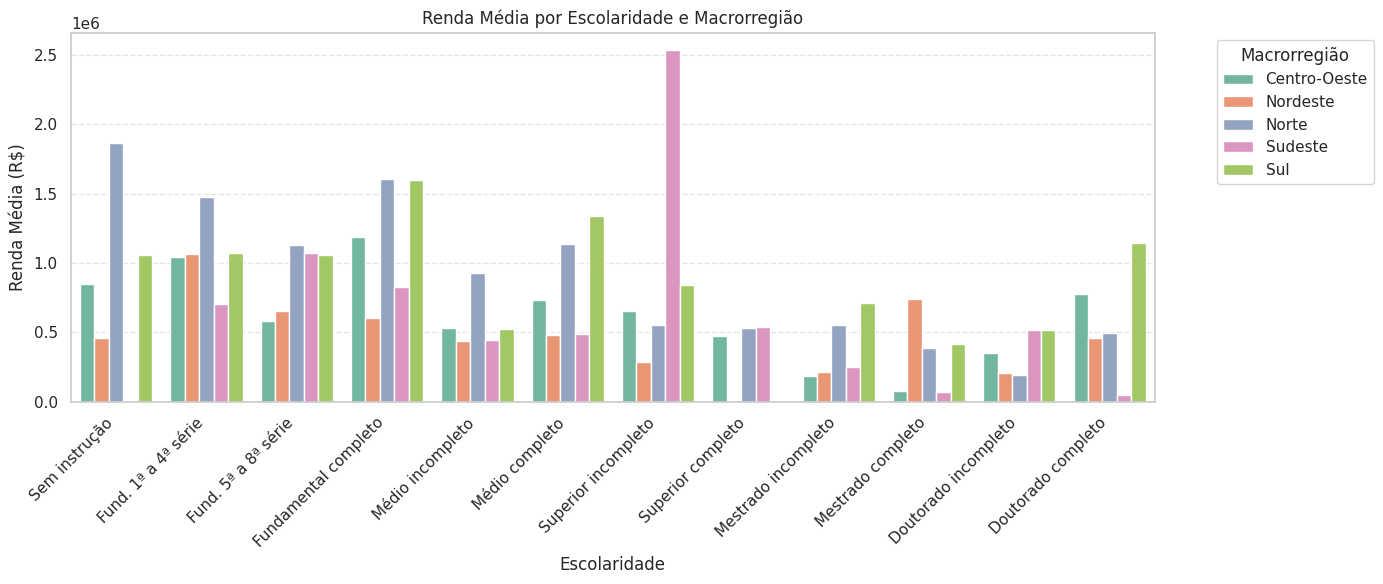

In [138]:
# Garante que a coluna está mapeada
assert 'Macrorregiao' in pnad_valid.columns
assert 'Escolaridade_Label' in pnad_valid.columns

# Agrupamento por Macrorregião + Escolaridade
grupo_macro_esc = pnad_valid.groupby(['Macrorregiao', 'Escolaridade_Label'])['Renda_Total'].mean().reset_index()

# Ordena as categorias para o gráfico ficar mais organizado
ordem_escolaridade = [
    "Sem instrução", "Fund. 1ª a 4ª série", "Fund. 5ª a 8ª série", "Fundamental completo",
    "Médio incompleto", "Médio completo", "Superior incompleto", "Superior completo",
    "Mestrado incompleto", "Mestrado completo", "Doutorado incompleto", "Doutorado completo"
]
grupo_macro_esc['Escolaridade_Label'] = pd.Categorical(grupo_macro_esc['Escolaridade_Label'], categories=ordem_escolaridade, ordered=True)

# Gráfico com seaborn
import seaborn as sns
plt.figure(figsize=(14, 6))
sns.barplot(
    data=grupo_macro_esc,
    x='Escolaridade_Label',
    y='Renda_Total',
    hue='Macrorregiao'
)

plt.title('Renda Média por Escolaridade e Macrorregião')
plt.ylabel('Renda Média (R$)')
plt.xlabel('Escolaridade')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Macrorregião', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


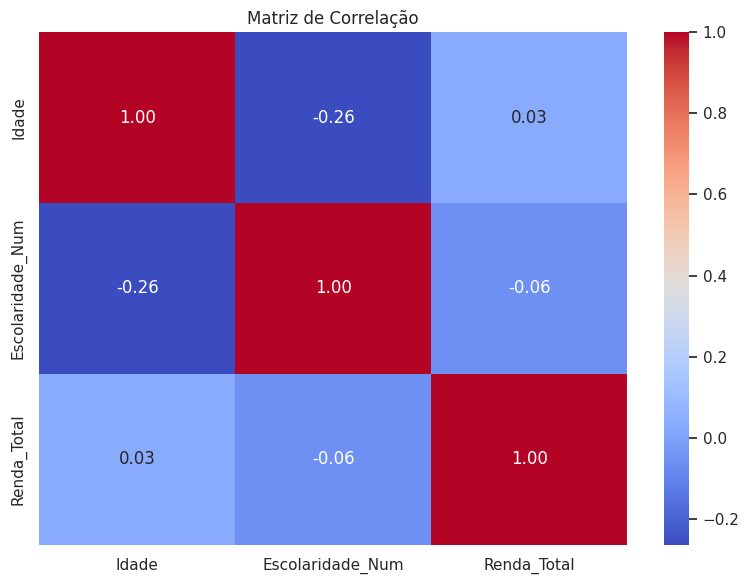

In [145]:
# Garante que os dados numéricos estejam prontos
colunas_correlacao = [
    'Idade do morador na data de referência',
    'Curso mais elevado frequentado anteriormente',
    'Renda_Total'
]

# Subconjunto dos dados positivos
pnad_corr = pnad_df[pnad_df['Renda_Total'] > 0].copy()

# Converte os campos, se ainda não estiverem no tipo certo
pnad_corr['Idade'] = pd.to_numeric(pnad_corr['idade'], errors='coerce')
pnad_corr['Escolaridade_Num'] = pd.to_numeric(pnad_corr['Curso mais elevado frequentado anteriormente'], errors='coerce')
pnad_corr['Renda_Total'] = pd.to_numeric(pnad_corr['Renda_Total'], errors='coerce')

# Matriz de correlação
matriz_corr = pnad_corr[['Idade', 'Escolaridade_Num', 'Renda_Total']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.show()


In [146]:
# Cria uma cópia segura do DataFrame com renda positiva
pnad_sem_outliers = pnad_df[pnad_df['Renda_Total'] > 0].copy()

# Define o limite superior com base no percentil 99.5%
limite_superior = pnad_sem_outliers['Renda_Total'].quantile(0.995)

# Filtra os dados
pnad_sem_outliers = pnad_sem_outliers[pnad_sem_outliers['Renda_Total'] <= limite_superior]

print(f"Limite superior de renda (99.5%): R$ {limite_superior:,.2f}")
print(f"Total de registros após remoção: {pnad_sem_outliers.shape[0]}")



Limite superior de renda (99.5%): R$ 12,000,012.16
Total de registros após remoção: 21775


In [147]:
# Aplicar log natural da renda (log(1 + renda) para evitar log(0))
pnad_sem_outliers['log_renda'] = np.log1p(pnad_sem_outliers['Renda_Total'])


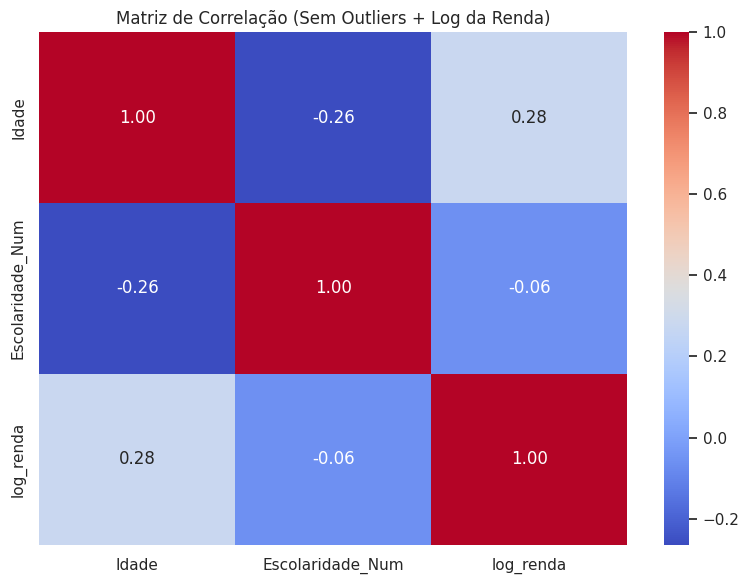

In [149]:
# Garante que tudo está numérico e correto
pnad_sem_outliers['Idade'] = pd.to_numeric(pnad_sem_outliers['idade'], errors='coerce')
pnad_sem_outliers['Escolaridade_Num'] = pd.to_numeric(pnad_sem_outliers['Curso mais elevado frequentado anteriormente'], errors='coerce')

# Matriz de correlação com log da renda
matriz_corr_limpa = pnad_sem_outliers[['Idade', 'Escolaridade_Num', 'log_renda']].corr()

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr_limpa, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação (Sem Outliers + Log da Renda)')
plt.tight_layout()
plt.show()


In [152]:
# Ver quais colunas estão disponíveis no DataFrame
print(pnad_sem_outliers.columns.tolist())


['Ano', 'Trimestre', 'UF', 'Capital', 'RM_RIDE', 'UPA', 'Estrato', 'Selecao_Domicilio', 'Painel', 'Situacao_Domicilio', 'Tipo de área (1 - Urbana, 2 - Rural)', 'Projeção da população por níveis geográficos', 'Peso do domicílio e das pessoas', 'Peso do domicílio e das pessoas (com correção)', 'Projeção da população por sexo e idade', 'Domínios de projeção geográficos', 'Domínios de projeção por sexo e idade', 'Número de pessoas no domicílio', 'Número de ordem dos moradores', 'Condição no domicílio', 'Sexo', 'Dia de nascimento (01 a 31)', 'Mês de nascimento (01 a 12)', 'Ano de nascimento', 'idade', 'Cor_Raca', 'Sabe ler e escrever? (1 - Sim, 2 - Não)', 'Frequenta escola? (1 - Sim, 2 - Não)', 'Tipo de escola frequentada (1 - Pública, 2 - Privada)', 'Curso frequentado (01 - Pré-escola, 02 - Ensino Fundamental, etc.)', 'Tipo de organização do curso (1 - Anos, 2 - Períodos semestrais)', 'Ano/Série que frequenta', 'Ensino fundamental regular ou EJA? (1 - Sim, 2 - Não)', 'Concluiu curso de gra

In [157]:
# Define o filtro para identificar os registros inconsistentes
filtro_outlier = (
    (pnad_sem_outliers['Renda_Total'] > 200000) &
    (pnad_sem_outliers['Setor_Economico'] == 'Desconhecido') &
    (pnad_sem_outliers['Escolaridade_Label'].isin([
        "Sem instrução", "Fund. 1ª a 4ª série", "Fund. 5ª a 8ª série", "Fundamental completo"
    ]))
)

# Ver quantos registros seriam removidos
print(f"Total de registros a remover: {filtro_outlier.sum()}")

# Cria nova base limpa desses casos
pnad_limpo = pnad_sem_outliers[~filtro_outlier].copy()


Total de registros a remover: 537


In [158]:
# Filtra os registros com escolaridade baixa (base limpa)
baixa_esc_limpo = pnad_limpo[
    pnad_limpo['Escolaridade_Label'].isin([
        "Sem instrução", "Fund. 1ª a 4ª série", "Fund. 5ª a 8ª série", "Fundamental completo"
    ])
]

# Top 10 rendas mais altas
top_baixa_esc_limpo = baixa_esc_limpo.sort_values(by='Renda_Total', ascending=False).head(10)

# Colunas principais
colunas_destaque = ['UF', 'Sexo', 'Renda_Total', 'Escolaridade_Label', 'Setor_Economico', 'Cor_Raca']
top_baixa_esc_limpo[colunas_destaque]


,UF,Sexo,Renda_Total,Escolaridade_Label,Setor_Economico,Cor_Raca
76082,Paraná,Masculino,1190.0,Fundamental completo,Desconhecido,Parda
53284,Sergipe,Feminino,1190.0,Fundamental completo,Desconhecido,Preta
18609,Amapá,Masculino,1170.0,Fundamental completo,Desconhecido,Parda
17125,Pará,Masculino,1170.0,Fund. 1ª a 4ª série,Desconhecido,Parda
93291,Goiás,Masculino,1160.0,Fundamental completo,Desconhecido,Branca
95748,Goiás,Masculino,1150.0,Fundamental completo,Desconhecido,Parda
93281,Goiás,Masculino,1150.0,Fund. 5ª a 8ª série,Desconhecido,Parda
86378,Mato Grosso do Sul,Masculino,1140.0,Fundamental completo,Desconhecido,Parda
81234,Rio Grande do Sul,Masculino,1140.0,Fundamental completo,Desconhecido,Branca
66256,Rio de Janeiro,Masculino,1140.0,Fundamental completo,Desconhecido,Parda


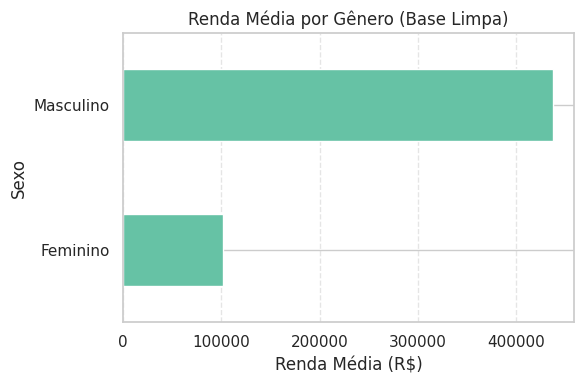

In [159]:
renda_genero_limpo = pnad_limpo.groupby('Sexo')['Renda_Total'].mean().sort_values()

renda_genero_limpo.plot(kind='barh', figsize=(6,4), title='Renda Média por Gênero (Base Limpa)')
plt.xlabel('Renda Média (R$)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [161]:
# Conta valores não nulos para possíveis proxies setoriais
print("Seção da atividade:", pnad_limpo['Seção da atividade'].notna().sum())
print("Trabalho era na área (1-Agro, 2-Indústria...):", pnad_limpo['Esse trabalho era na área (1 - Agricultura, 2 - Indústria, etc.)'].notna().sum())
print("Código da ocupação (Cargo ou função):", pnad_limpo['Código da ocupação (Cargo ou função)'].notna().sum())


Seção da atividade: 15635
Trabalho era na área (1-Agro, 2-Indústria...): 15635
Código da ocupação (Cargo ou função): 77


In [162]:
# Top 10 setores pela Seção da Atividade
setores_secao = pnad_limpo.groupby('Seção da atividade')['Renda_Total'].mean().sort_values(ascending=False).head(10)

print("Top setores por Seção da Atividade:")
print(setores_secao.round(2))


Top setores por Seção da Atividade:
Seção da atividade
5.0    954298.11
1.0    683546.99
2.0    190933.69
4.0    139316.76
9.0    108530.61
6.0     84828.24
3.0     43473.49
0.0     36411.66
7.0       363.56
8.0       149.53
Name: Renda_Total, dtype: float64


In [163]:
# Dicionário de tradução
area_dict = {
    1: 'Agricultura',
    2: 'Indústria',
    3: 'Comércio',
    4: 'Serviços',
    5: 'Administração Pública'
}

# Mapear valores
pnad_limpo['Area_Atuacao'] = pnad_limpo['Esse trabalho era na área (1 - Agricultura, 2 - Indústria, etc.)'].map(area_dict)

# Agrupar e exibir
setores_area = pnad_limpo.groupby('Area_Atuacao')['Renda_Total'].mean().sort_values(ascending=False)

print("Renda média por Área de Atuação:")
print(setores_area.round(2))



Renda média por Área de Atuação:
Area_Atuacao
Administração Pública    1242071.66
Comércio                   35854.65
Agricultura                11497.49
Serviços                   11184.65
Indústria                   1150.70
Name: Renda_Total, dtype: float64


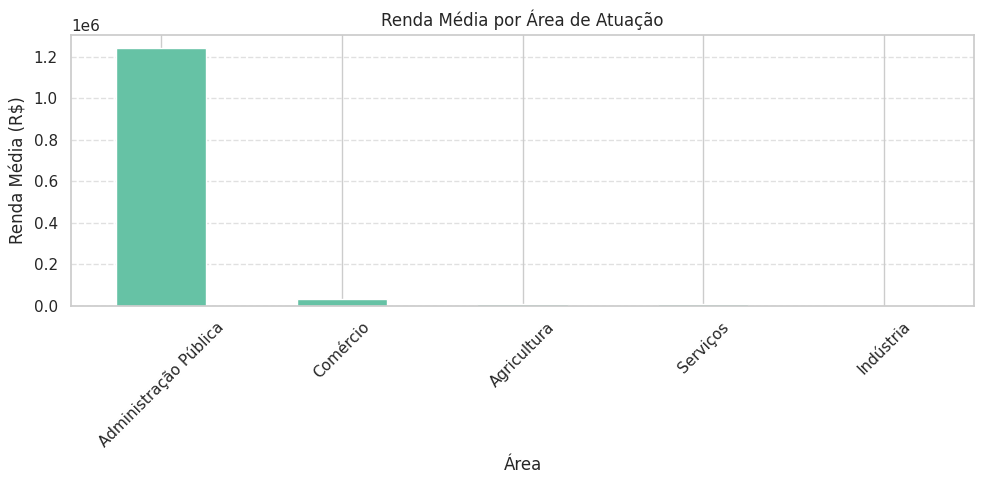

In [164]:
# Gráfico de barras com a área mapeada
setores_area.plot(kind='bar', figsize=(10, 5))
plt.title('Renda Média por Área de Atuação')
plt.ylabel('Renda Média (R$)')
plt.xlabel('Área')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


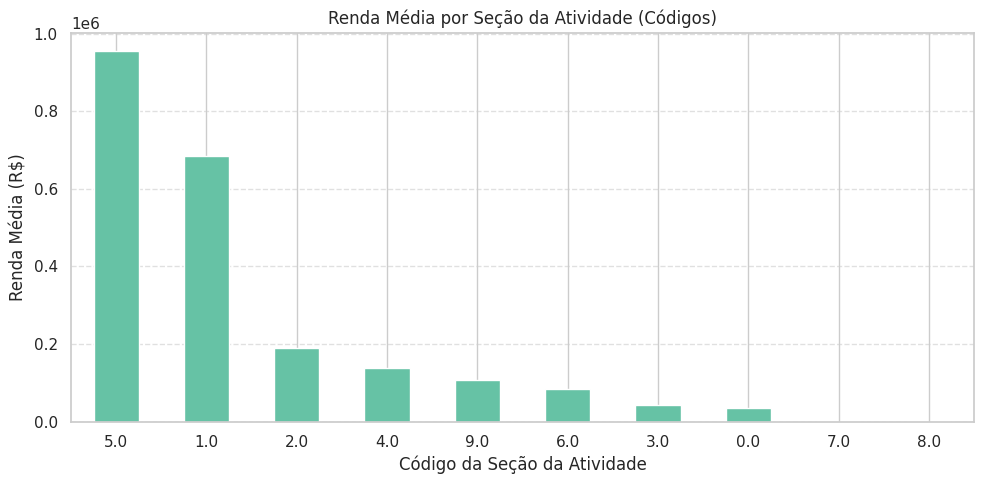

In [165]:
# Gráfico de barras com os códigos da seção da atividade
setores_secao.plot(kind='bar', figsize=(10, 5))
plt.title('Renda Média por Seção da Atividade (Códigos)')
plt.ylabel('Renda Média (R$)')
plt.xlabel('Código da Seção da Atividade')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [166]:
colunas_modelagem = [
    'Renda_Total', 'log_renda',
    'Sexo', 'Cor_Raca', 'UF',
    'Escolaridade_Num', 'Escolaridade_Label',
    'Idade',
    'Setor_Economico',
    'Area_Atuacao',
    'Faixa_Etaria'
]

df_modelagem = pnad_limpo[colunas_modelagem].copy()


In [167]:
# CSV tradicional
df_modelagem.to_csv("dados_modelagem.csv", index=False, encoding="utf-8-sig")
